<a href="https://colab.research.google.com/github/IshraqAhmedJamaluddin/ML1/blob/main/Final_Project_(ML1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 25.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
import warnings
warnings.filterwarnings('ignore')
from google.colab.patches import cv2_imshow

In [ ]:
!wget 'http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip'   # downloading the data zip file

--2023-02-19 09:18:44--  http://www.cbsr.ia.ac.cn/users/xiangyuzhu/projects/3DDFA/Database/AFLW2000-3D.zip
Resolving www.cbsr.ia.ac.cn (www.cbsr.ia.ac.cn)... 159.226.21.60
Connecting to www.cbsr.ia.ac.cn (www.cbsr.ia.ac.cn)|159.226.21.60|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87413900 (83M) [application/x-zip-compressed]
Saving to: ‘AFLW2000-3D.zip’

AFLW2000-3D.zip     100%[===================>]  83.36M   280KB/s    in 5m 7s   

2023-02-19 09:23:52 (278 KB/s) - ‘AFLW2000-3D.zip’ saved [87413900/87413900]



In [ ]:
!unzip /content/AFLW2000-3D.zip

Archive:  /content/AFLW2000-3D.zip
   creating: AFLW2000/
   creating: AFLW2000/Code/
  inflating: AFLW2000/Code/DrawSolidHead.m  
  inflating: AFLW2000/Code/DrawTextureHead.m  
  inflating: AFLW2000/Code/main_show_without_BFM.m  
  inflating: AFLW2000/Code/main_show_with_BFM.m  
   creating: AFLW2000/Code/Mex/
  inflating: AFLW2000/Code/Mex/compile.m  
  inflating: AFLW2000/Code/Mex/Tnorm_Vnorm.h  
  inflating: AFLW2000/Code/Mex/Tnorm_VnormC.cpp  
  inflating: AFLW2000/Code/Mex/Tnorm_VnormC.mexw64  
   creating: AFLW2000/Code/ModelGeneration/
  inflating: AFLW2000/Code/ModelGeneration/ModelGenerate.m  
  inflating: AFLW2000/Code/ModelGeneration/model_info.mat  
  inflating: AFLW2000/Code/Model_Exp.mat  
  inflating: AFLW2000/Code/Model_Shape_Sim.mat  
  inflating: AFLW2000/Code/NormDirection.m  
  inflating: AFLW2000/Code/readme.txt  
  inflating: AFLW2000/Code/RotationMatrix.m  
  inflating: AFLW2000/Code/Tnorm_VnormC.mexw64  
  inflating: AFLW2000/image00002.jpg  
  inflating: AFLW2

In [ ]:
def draw_axis(img, pitch, yaw, roll, tdx=None, tdy=None, size = 100):

    yaw = -yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2

    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    #        v
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

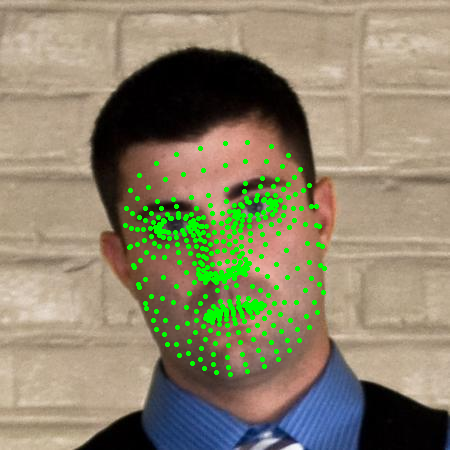

In [ ]:
# choosing random image
random_file = 'image00013'
data = []
lst_xy = [] 
faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread('/content/AFLW2000/'+random_file+'.jpg')
    if image is not None:
      # processing the face to extract the landmark points (468 point) for each x,y,z
      results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      if results.multi_face_landmarks != None:
        # looping over the faces in the image
        face = results.multi_face_landmarks[0]
        i = 1
        for landmarks in face.landmark:
          x = landmarks.x
          y = landmarks.y

          x_nose = face.landmark[4].x
          y_nose = face.landmark[4].y

          lst_xy.append(x)
          lst_xy.append(y)

          shape = image.shape
          relative_x = int(x * shape[1])
          relative_y = int(y * shape[0])
          cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)

        mat_file = sio.loadmat('/content/AFLW2000/'+random_file+'.mat')
        pose_para = mat_file["Pose_Para"][0][:3]
        pitch = pose_para[0]
        yaw = pose_para[1]
        roll = pose_para[2]
        # print(pose_para)

        lst_xy.append(pitch)
        lst_xy.append(yaw)
        lst_xy.append(roll)

        data.append(np.array(lst_xy).reshape(-1))
      cv2_imshow(image)

In [ ]:
print(len(lst_xy))
print(lst_xy)

939
[0.5102384090423584, 0.6690378189086914, 0.4927288293838501, 0.6047969460487366, 0.499755859375, 0.6244677901268005, 0.4673677980899811, 0.5423623323440552, 0.4882001280784607, 0.5847010016441345, 0.4835951030254364, 0.5581691265106201, 0.47426867485046387, 0.49468016624450684, 0.35795894265174866, 0.5136451721191406, 0.4686638414859772, 0.4576417803764343, 0.4640171527862549, 0.43353885412216187, 0.44461575150489807, 0.3305796980857849, 0.5123656988143921, 0.6781419515609741, 0.5143190622329712, 0.684333086013794, 0.515572726726532, 0.6863126754760742, 0.5183901786804199, 0.693057656288147, 0.5196228623390198, 0.6999405026435852, 0.5215105414390564, 0.709183394908905, 0.5240036249160767, 0.7193206548690796, 0.5295942425727844, 0.7392519116401672, 0.4956156313419342, 0.6149015426635742, 0.48242390155792236, 0.616071343421936, 0.2807443141937256, 0.4624778628349304, 0.4102826714515686, 0.5219194293022156, 0.3932781219482422, 0.5270471572875977, 0.37674474716186523, 0.529496669769287

In [ ]:
data = pd.DataFrame(data)

In [ ]:
data.shape

(1, 939)

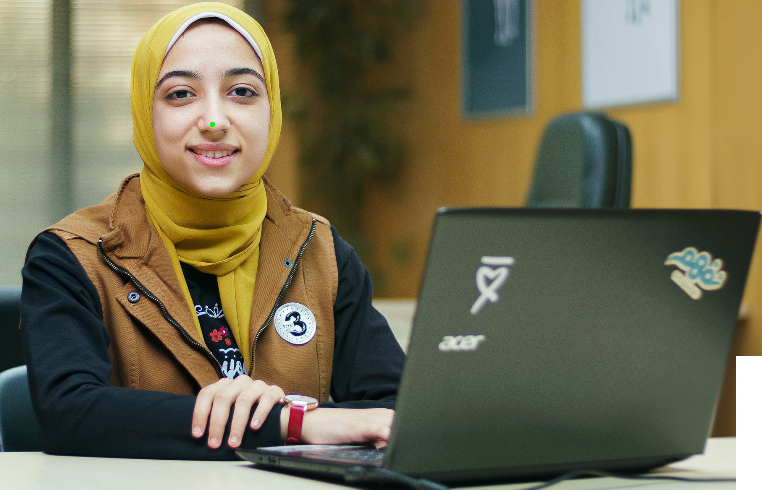

In [ ]:
# choosing random image
random_file = 'Layer 2'

faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread('/content/'+random_file+'.png')
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None: 
      # looping over the faces in the image
      face = results.multi_face_landmarks[0]

      x_nose = face.landmark[4].x
      y_nose = face.landmark[4].y
      shape = image.shape 
      relative_x = int(x_nose * shape[1])
      relative_y = int(y_nose * shape[0])
      cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
      # cv2.putText(image, str(5), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0,0,0), 1)

      # for index in range(10):
      #   X = face.landmark[index].x
      #   Y = face.landmark[index].y
      #   shape = image.shape
      #   xx = int(X * shape[1])
      #   yy = int(Y * shape[0])
      #   cv2.putText(image, str(index+1), (xx,yy), cv2.FONT_HERSHEY_SIMPLEX, 0.25, (0,0,0), 1)
      # i = 1
      # for landmarks in face.landmark:
      #     # print(landmarks)
      #     x = landmarks.x
      #     y = landmarks.y
      #     mat_file = sio.loadmat('/content/AFLW2000/'+filename+'.mat')
      #     pose_para = mat_file["Pose_Para"][0][:3]
      #     pitch = pose_para[0]
      #     yaw = pose_para[1]
      #     roll = pose_para[2]

      #     lms.append(pitch)
      #     lms.append(yaw)
      #     lms.append(roll)

      # dflst.append(np.array(lms).reshape(-1))
      #     # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
      #     shape = image.shape 
      #     relative_x = int(x * shape[1])
      #     relative_y = int(y * shape[0])
      #     cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
          # print(shape)

          # # font
          # font = cv2.FONT_HERSHEY_SIMPLEX
          # # org
          # org = (relative_x, relative_y)
          
          # # fontScale
          # fontScale = 0.3
          
          # # Blue color in BGR
          # color = (0, 0, 0)
          
          # # Line thickness of 1 px
          # thickness = 1
          # image = cv2.putText(image, str(i), org, font, fontScale,color, thickness)
          # i += 1


      cv2_imshow(image)

In [ ]:
# face.landmark[4]

In [ ]:
# face.landmark

In [ ]:
# loop over all the images in the folder
directory = '/content/AFLW2000/'
df = []
for filename in os.listdir(directory):
  lm_xy = [] # list to hold landmarks points
  if filename.endswith('jpg'):
    faceModule = mediapipe.solutions.face_mesh
    # loading image and its correspinding mat file
    with faceModule.FaceMesh(static_image_mode=True) as faces:
        # loading the image
        image = cv2.imread(directory+filename)
        # processing the face to extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks != None: 
          # looping over the faces in the image
          face = results.multi_face_landmarks[0]
          for landmarks in face.landmark:
            x = landmarks.x
            y = landmarks.y

            lm_xy.append(x)
            lm_xy.append(y)

            # shape = image.shape
            # relative_x = int(x * shape[1])
            # relative_y = int(y * shape[0])
            # cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
          
          mat_file = sio.loadmat('/content/AFLW2000/'+filename[:-3]+'mat')
          pose_para = mat_file["Pose_Para"][0][:3]
          pitch = pose_para[0]
          yaw = pose_para[1]
          roll = pose_para[2]
          # print(pose_para)

          lm_xy.append(pitch)
          lm_xy.append(yaw)
          lm_xy.append(roll)

          df.append(np.array(lm_xy).reshape(-1))
            
        # cv2_imshow(image)

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df.shape

(1853, 939)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.to_csv("landmarks_and_angles.csv", index=None)

In [ ]:
df = pd.read_csv('landmarks_and_labels.csv').drop(['Unnamed: 0'], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,929,930,931,932,933,934,935,936,937,938
0,0.537275,0.658462,0.562258,0.616171,0.538312,0.626584,0.538255,0.563986,0.564414,0.601224,...,0.513421,0.534031,0.518465,0.569160,0.491356,0.572825,0.485177,-0.304961,-0.819743,0.037171
1,0.462494,0.680938,0.491776,0.641798,0.478581,0.642810,0.493573,0.567673,0.499129,0.626902,...,0.504628,0.554047,0.512304,0.664141,0.509327,0.677589,0.499090,-0.544066,0.003593,0.362706
2,0.586061,0.657358,0.606206,0.596979,0.578596,0.617263,0.575345,0.548370,0.607375,0.581206,...,0.509160,0.565666,0.512802,0.601090,0.496816,0.602998,0.490111,0.208705,-1.244902,-0.247792
3,0.519647,0.686766,0.475971,0.641352,0.501510,0.646663,0.447840,0.579149,0.466064,0.625290,...,0.497420,0.489277,0.506227,0.587744,0.440048,0.595030,0.429177,-0.391323,0.342428,-0.483296
4,0.496700,0.653161,0.474206,0.611557,0.488492,0.623231,0.463256,0.551305,0.471166,0.594077,...,0.498273,0.513946,0.502863,0.613553,0.474189,0.622524,0.465971,-0.280356,0.295803,-0.133340


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,929,930,931,932,933,934,935,936,937,938
count,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,...,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000,1853.000000
mean,0.505036,0.666149,0.503698,0.611075,0.504510,0.627596,0.490213,0.550968,0.503416,0.592989,...,0.503258,0.530948,0.507431,0.621081,0.485716,0.629547,0.478221,-0.095366,0.013611,-0.033167
std,0.041261,0.028346,0.053271,0.029041,0.037840,0.024675,0.044587,0.023908,0.054824,0.028645,...,0.023010,0.033922,0.022426,0.047496,0.038984,0.050135,0.041212,0.549292,0.580266,0.649282
min,0.256906,0.179093,0.227159,0.144636,0.249772,0.152404,0.222207,0.100594,0.223030,0.131856,...,0.055864,0.266672,0.060640,0.304541,0.032022,0.294275,0.024076,-12.457202,-6.130066,-16.969362
25%,0.482141,0.652247,0.469521,0.598221,0.481937,0.617026,0.460069,0.540801,0.466724,0.580285,...,0.491350,0.514206,0.496217,0.593103,0.463229,0.601160,0.454632,-0.246453,-0.256714,-0.160274
50%,0.505162,0.668768,0.501536,0.614621,0.503587,0.629840,0.485371,0.552197,0.501211,0.596475,...,0.502106,0.532342,0.506317,0.626023,0.485355,0.635011,0.477745,-0.123371,0.019403,-0.017463
75%,0.526248,0.682794,0.537543,0.627792,0.525717,0.641242,0.516599,0.562998,0.538674,0.609476,...,0.513950,0.546662,0.517966,0.650143,0.506548,0.660787,0.499799,0.028133,0.305791,0.126460
max,0.928491,0.799190,0.929157,0.776498,0.923774,0.782066,0.901552,0.745973,0.926027,0.767816,...,0.720868,0.908686,0.723342,0.990572,0.741343,0.998658,0.750775,15.598820,3.277500,2.166107


In [ ]:
df.shape

(1853, 939)

In [ ]:
df.isnull().sum().sum()

0

## Nose Points ##

In [ ]:
df8 = df['8'].copy()
df9 = df['9'].copy()

## Center all the points around the nose (Normalization) ## 

In [ ]:
# centering around the nose
for col in df.columns.astype('int')[:-3]:
    if col % 2 == 0: # x coord
        df[str(col)] = df[str(col)] - df8
    else:
        df[str(col)] = df[str(col)] - df9

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,929,930,931,932,933,934,935,936,937,938
0,-0.027139,0.057238,-0.002155,0.014947,-0.026102,0.025360,-0.026159,-0.037238,0.0,0.0,...,-0.087803,-0.030383,-0.082759,0.004746,-0.109868,0.008411,-0.116048,-0.304961,-0.819743,0.037171
1,-0.036635,0.054036,-0.007353,0.014895,-0.020548,0.015908,-0.005556,-0.059230,0.0,0.0,...,-0.122275,0.054918,-0.114599,0.165013,-0.117575,0.178460,-0.127812,-0.544066,0.003593,0.362706
2,-0.021314,0.076152,-0.001169,0.015774,-0.028779,0.036057,-0.032030,-0.032835,0.0,0.0,...,-0.072045,-0.041709,-0.068404,-0.006285,-0.084389,-0.004377,-0.091095,0.208705,-1.244902,-0.247792
3,0.053583,0.061476,0.009907,0.016061,0.035446,0.021373,-0.018224,-0.046141,0.0,0.0,...,-0.127870,0.023213,-0.119063,0.121680,-0.185242,0.128966,-0.196113,-0.391323,0.342428,-0.483296
4,0.025534,0.059084,0.003040,0.017480,0.017327,0.029154,-0.007910,-0.042772,0.0,0.0,...,-0.095804,0.042781,-0.091214,0.142387,-0.119888,0.151358,-0.128105,-0.280356,0.295803,-0.133340


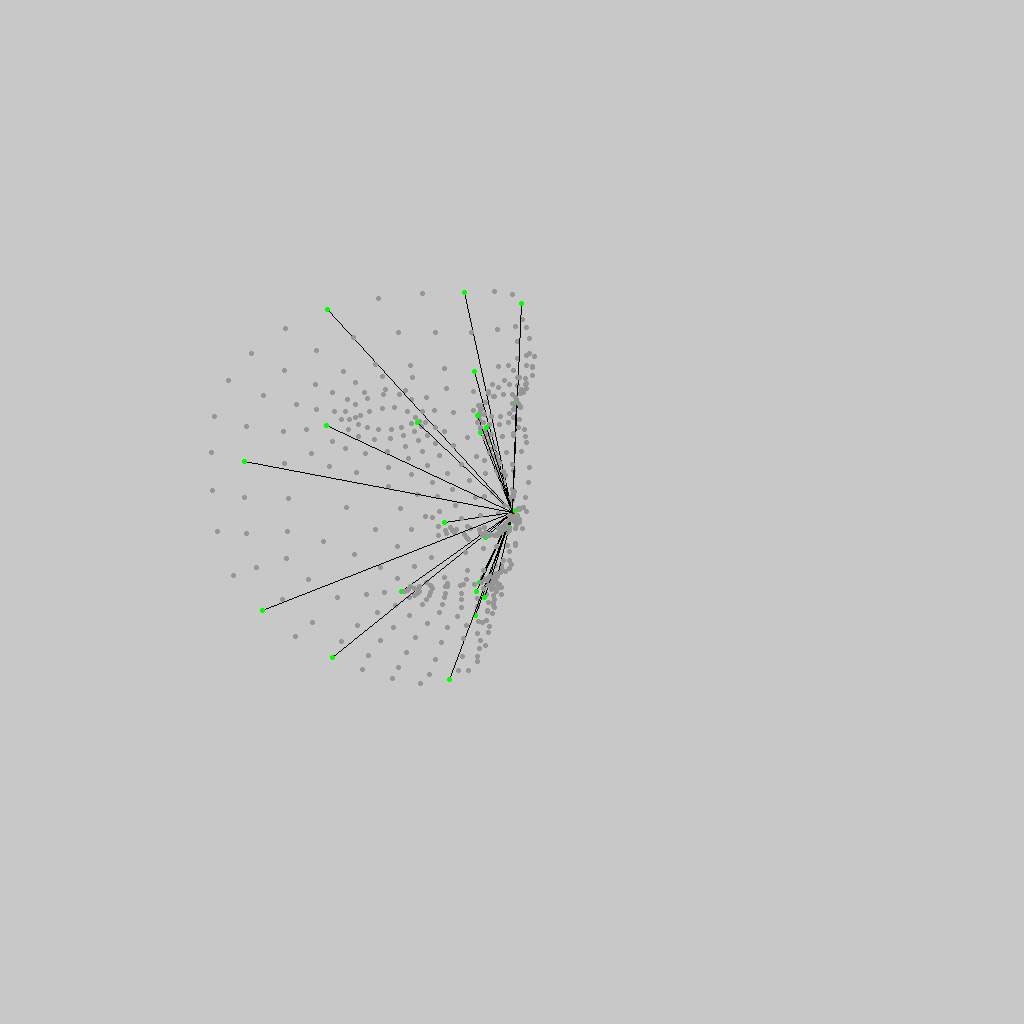

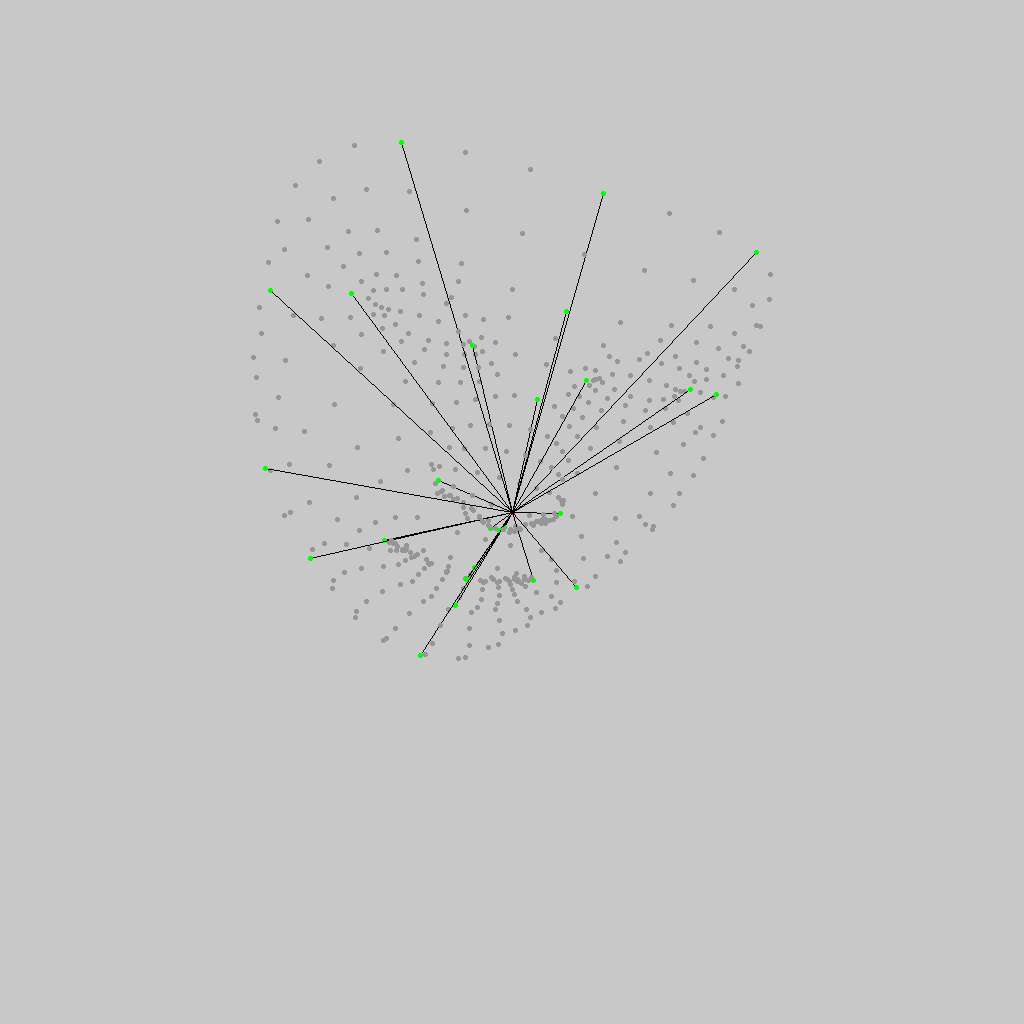

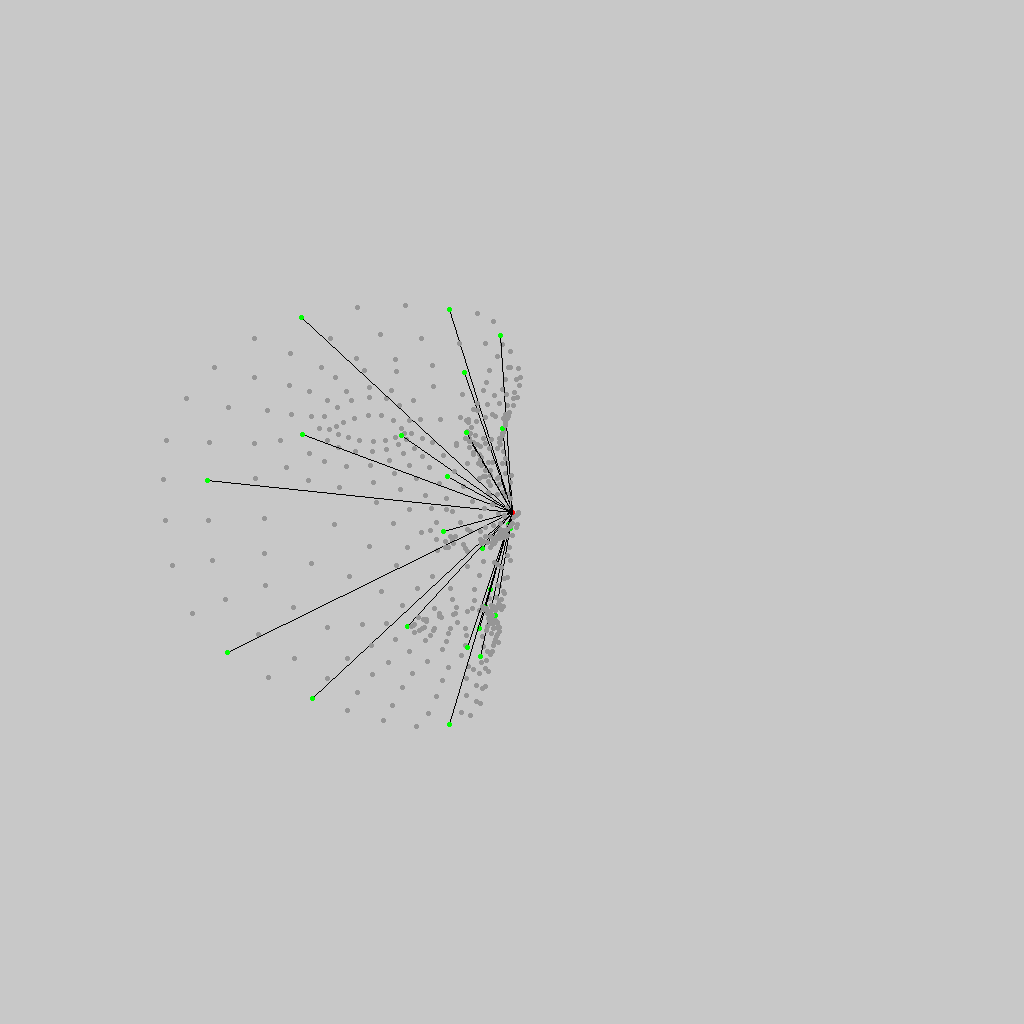

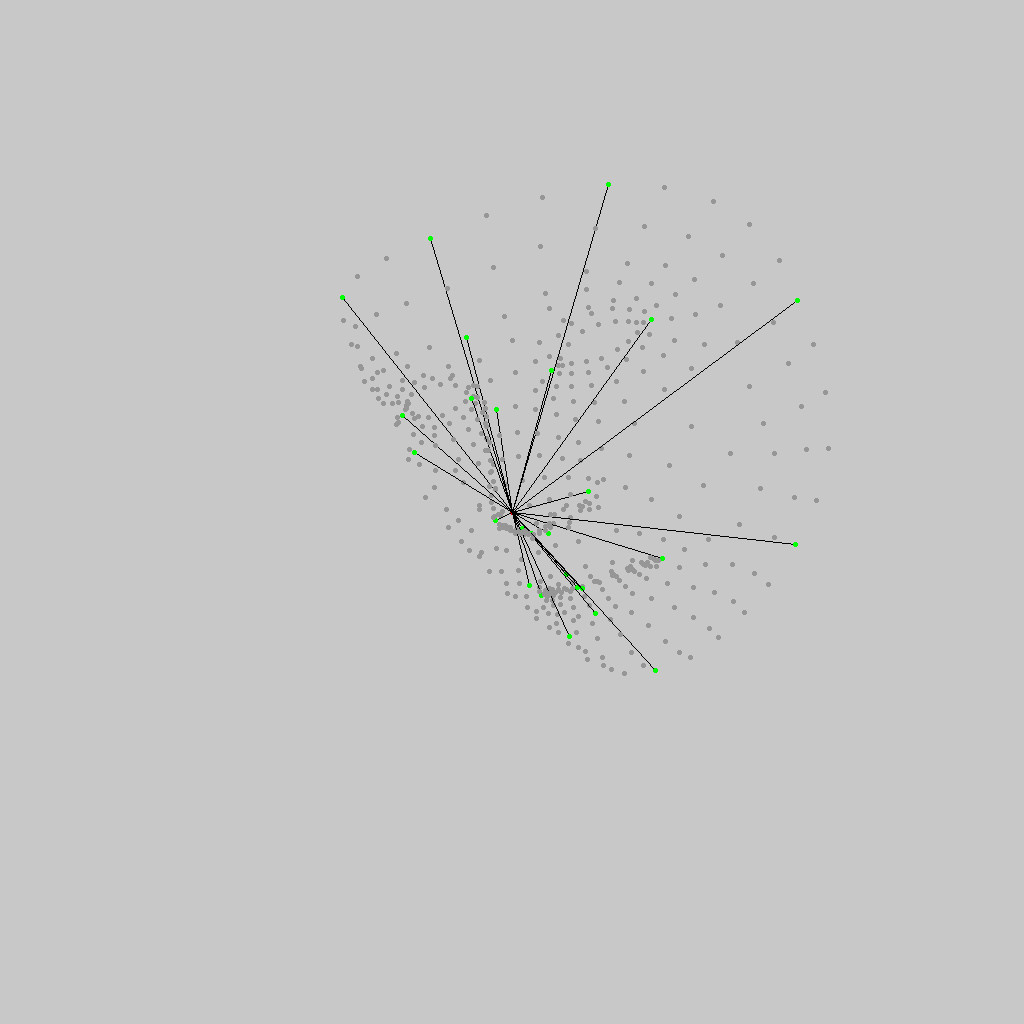

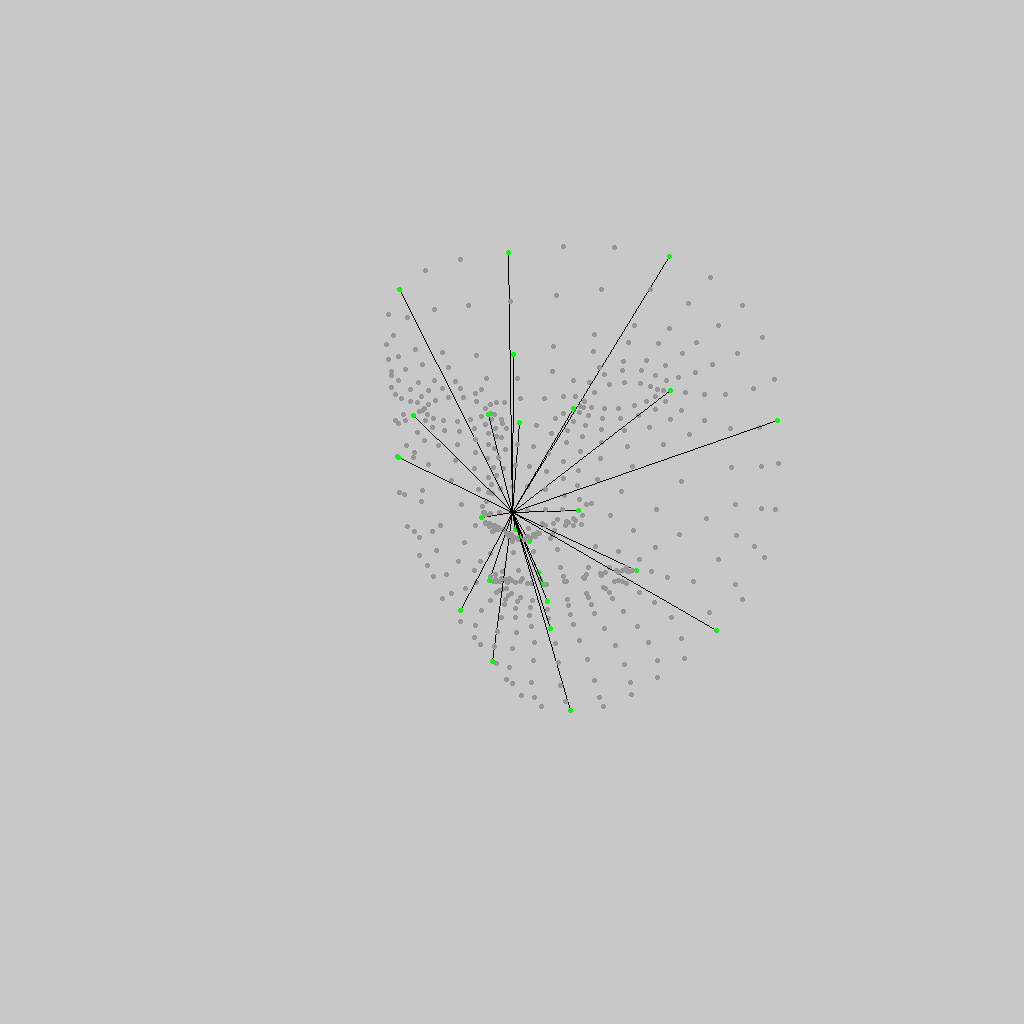

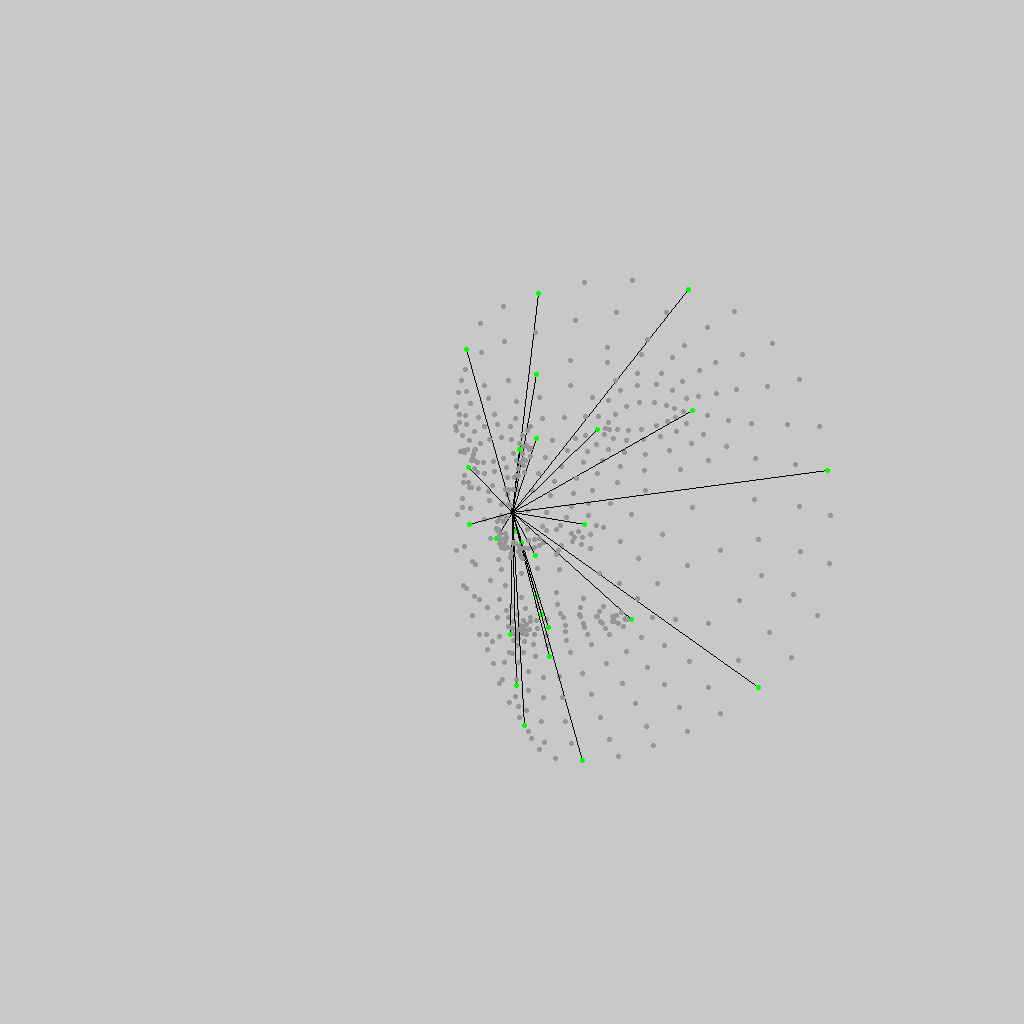

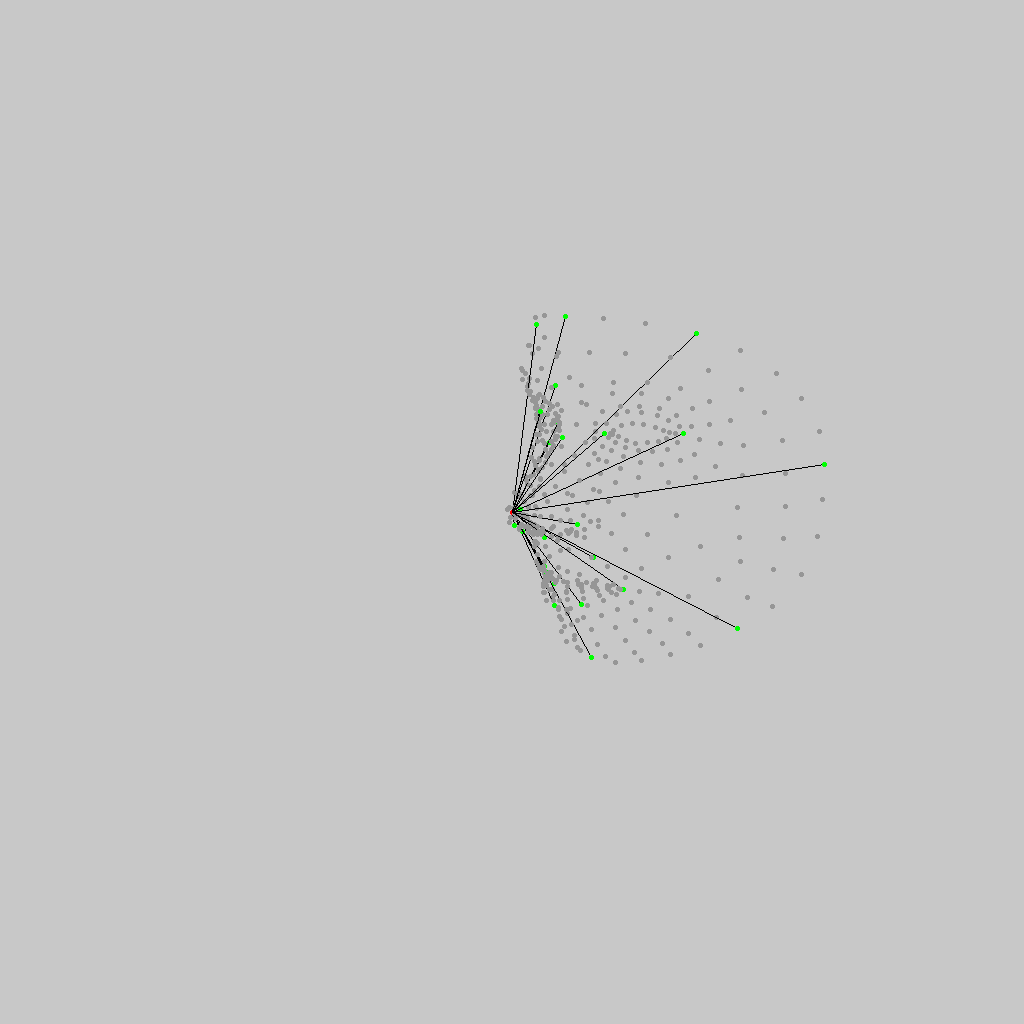

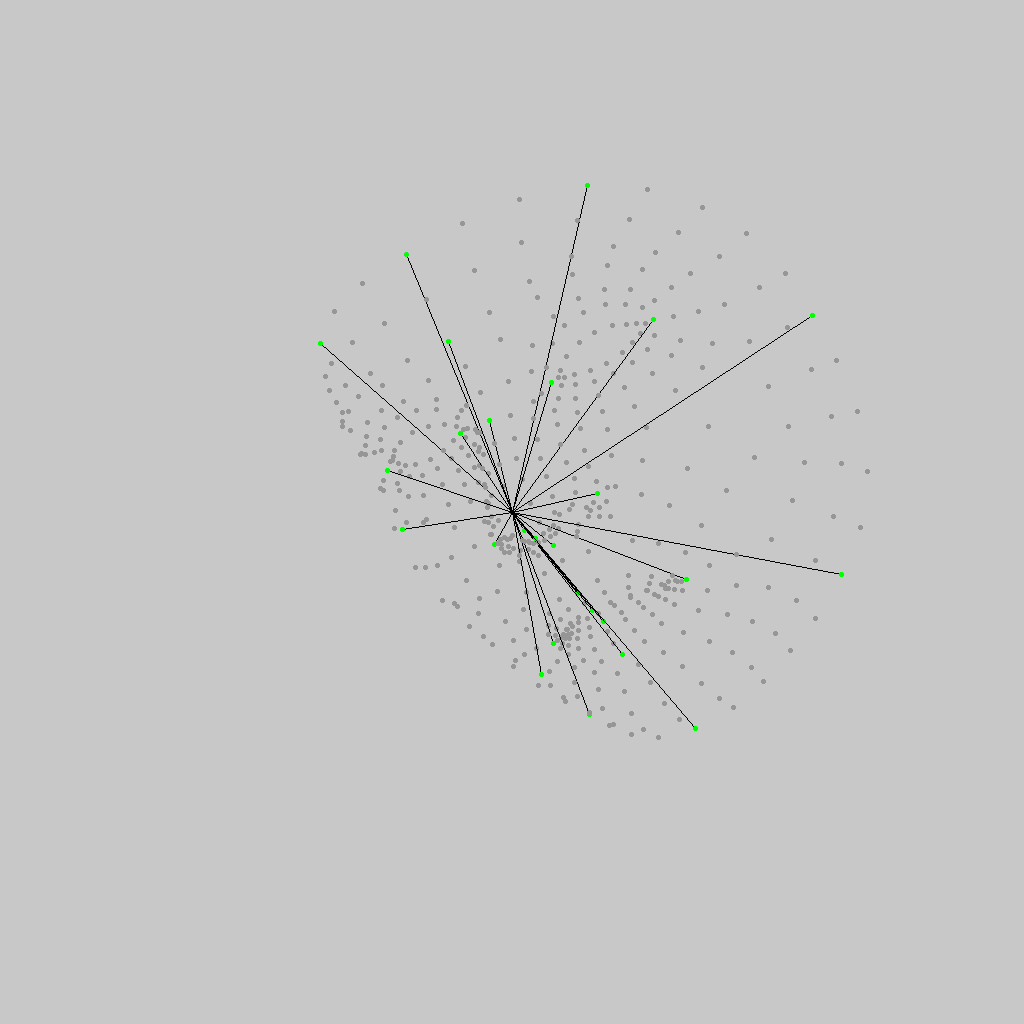

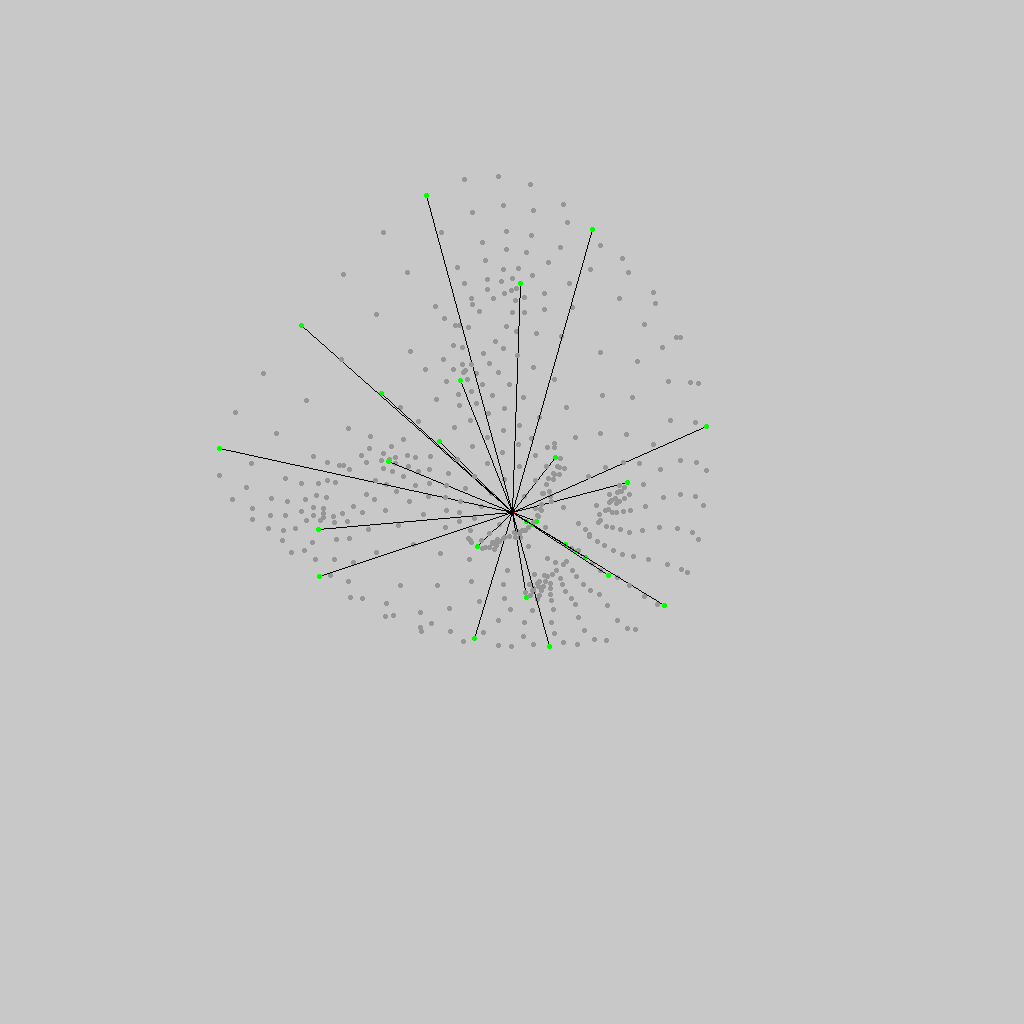

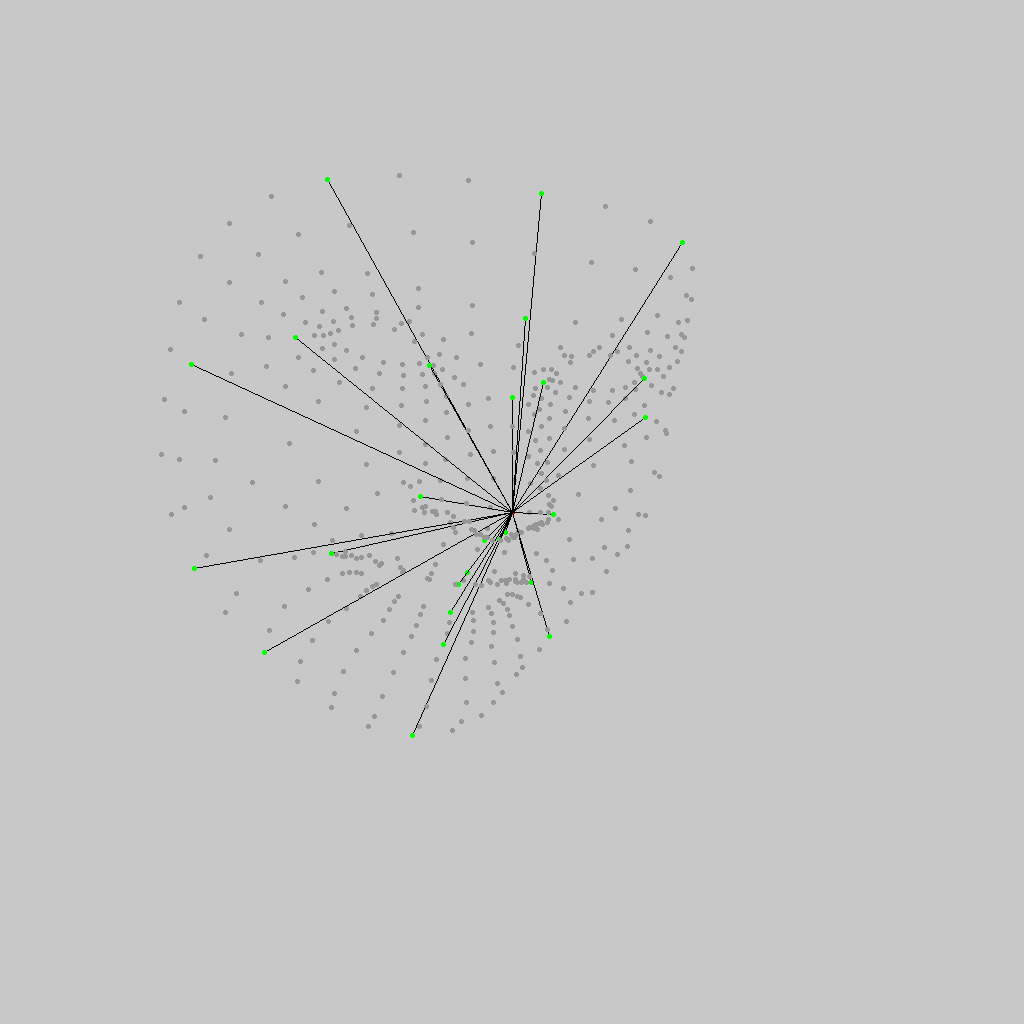

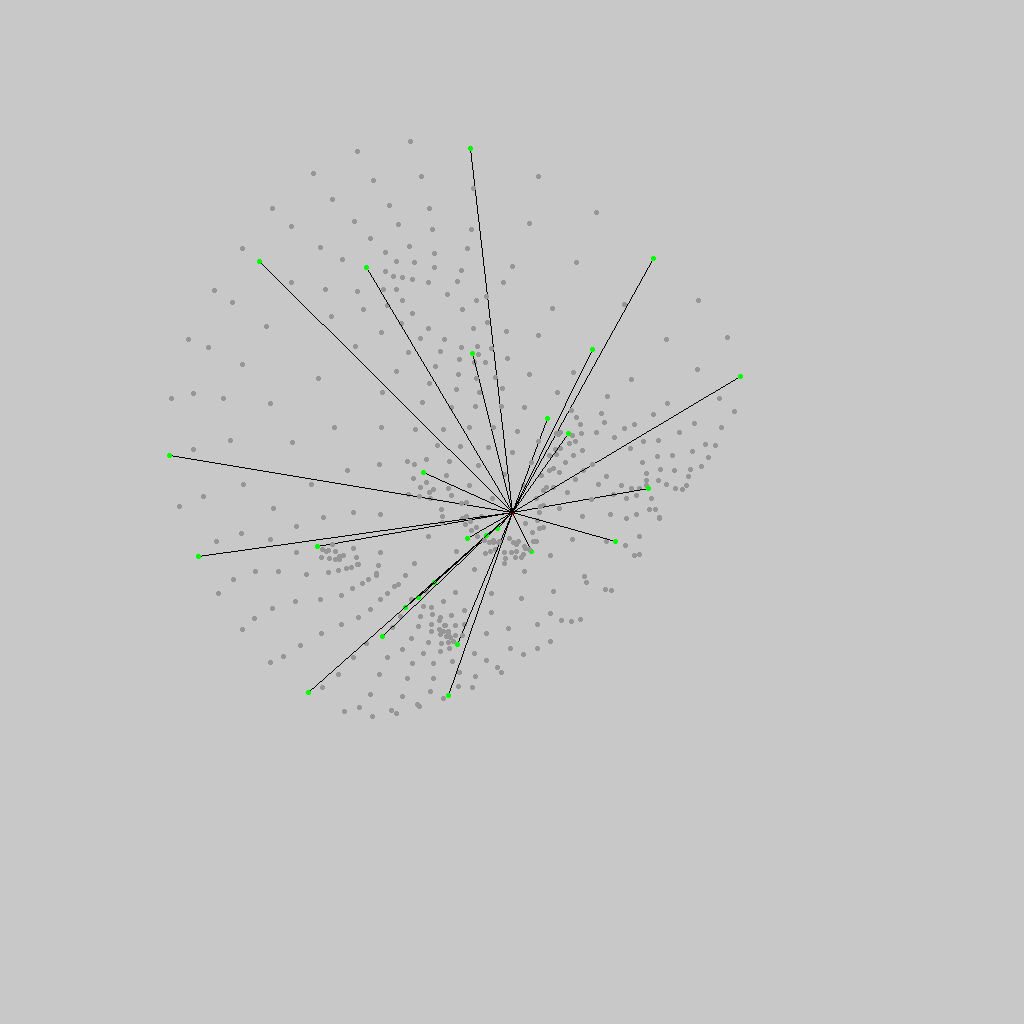

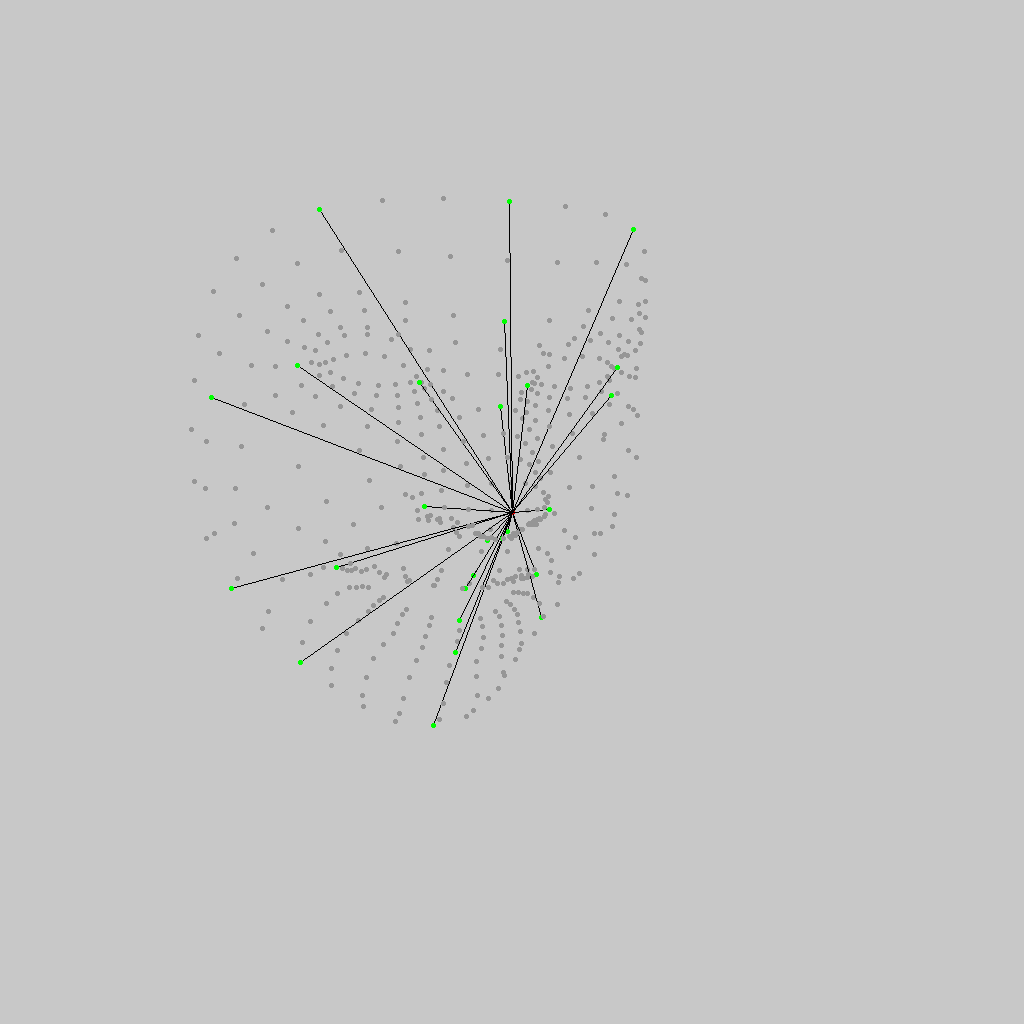

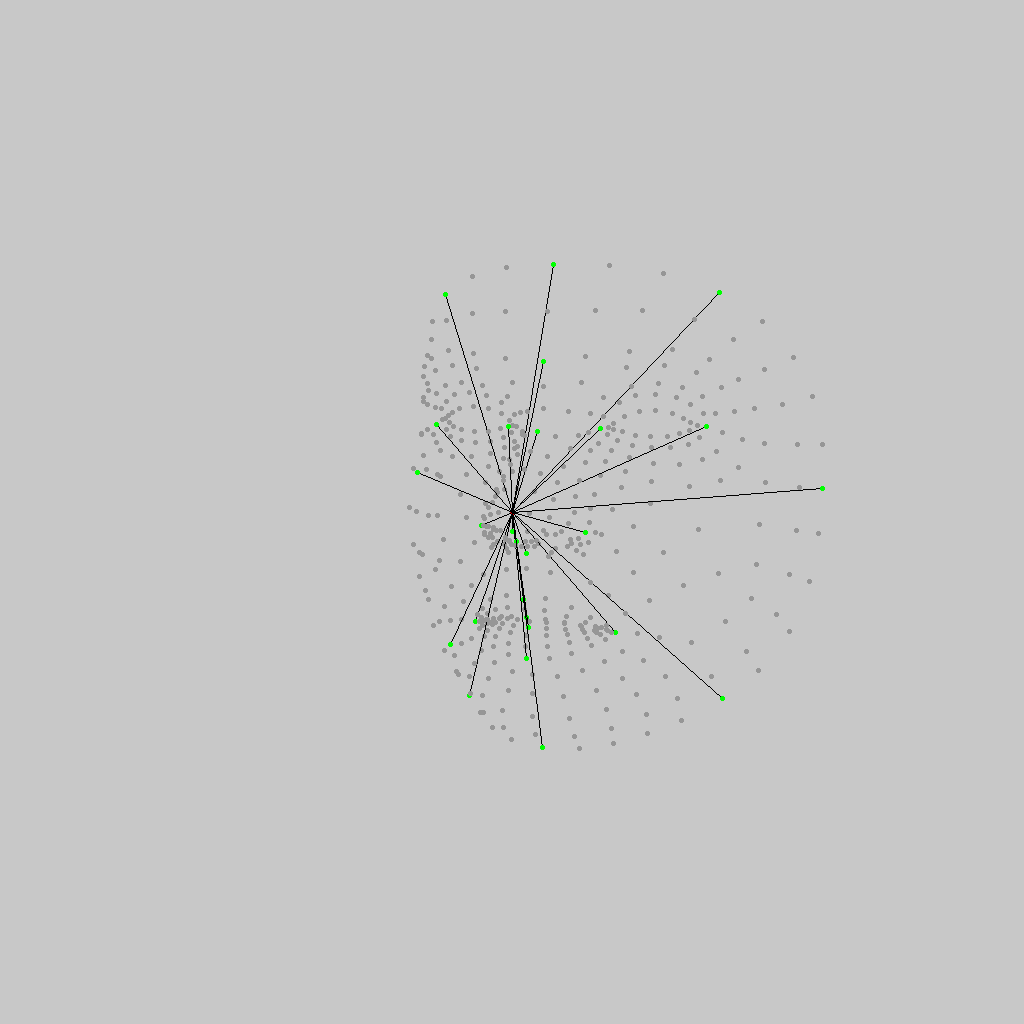

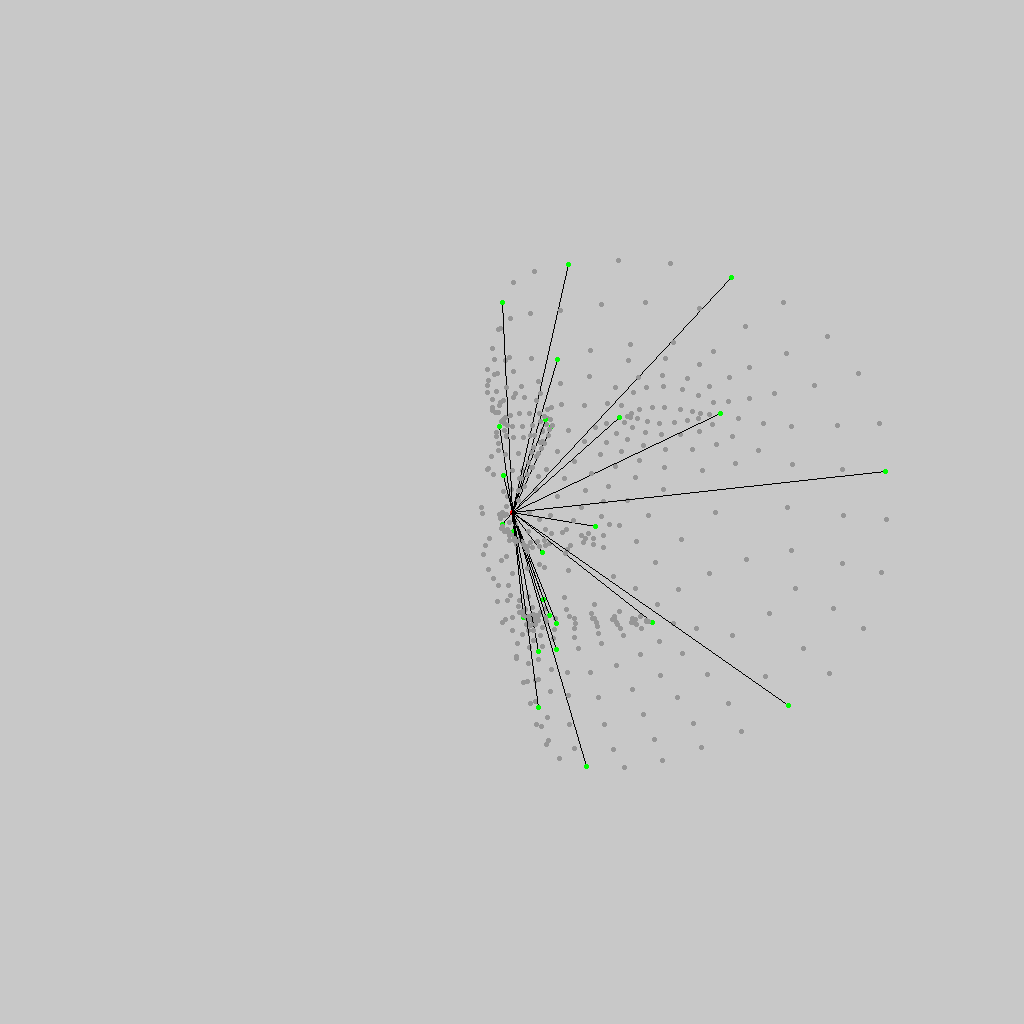

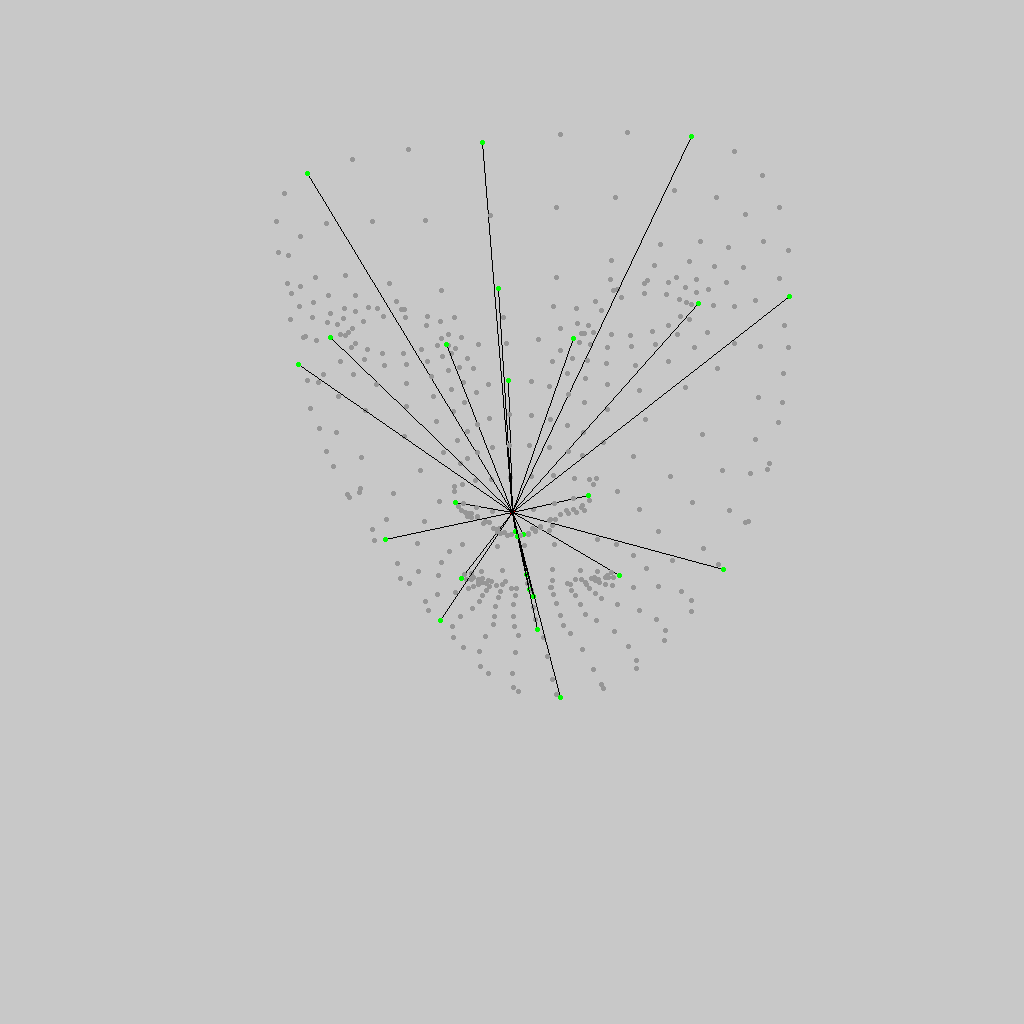

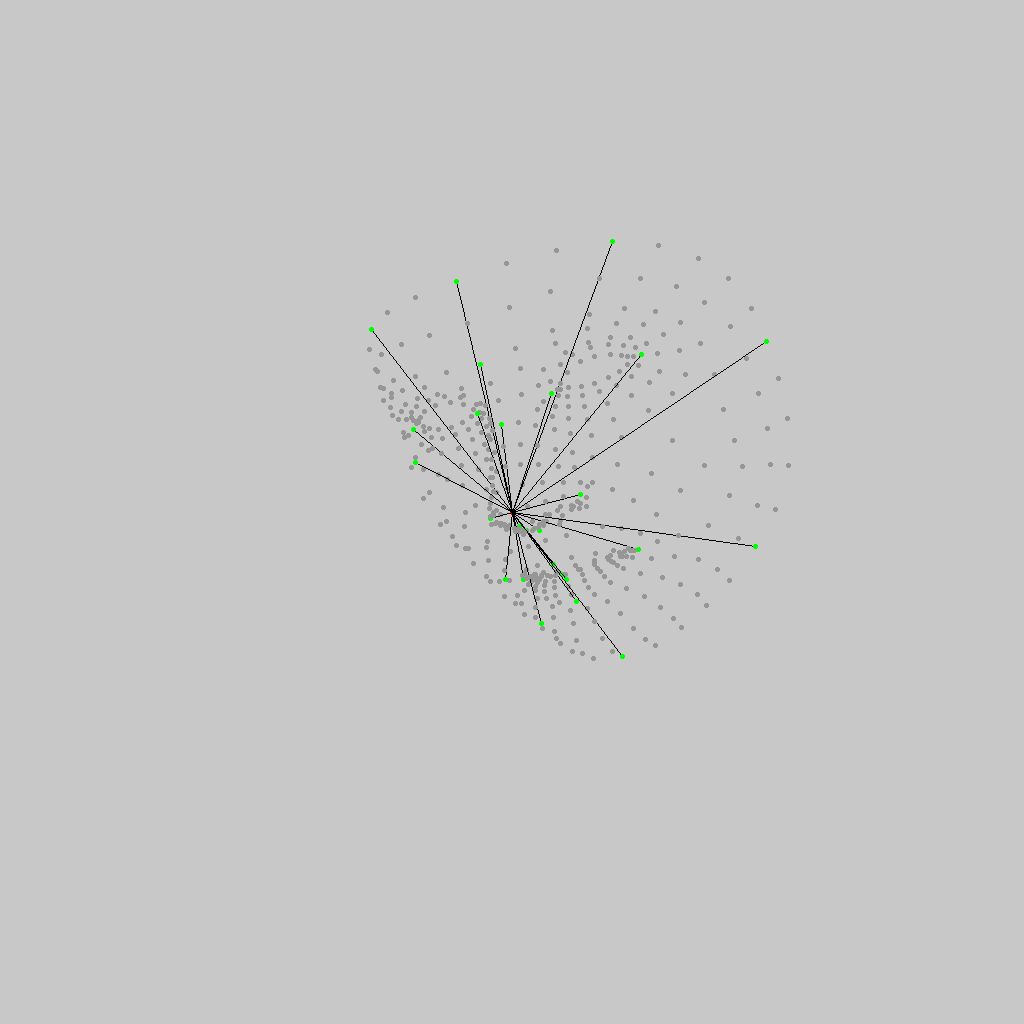

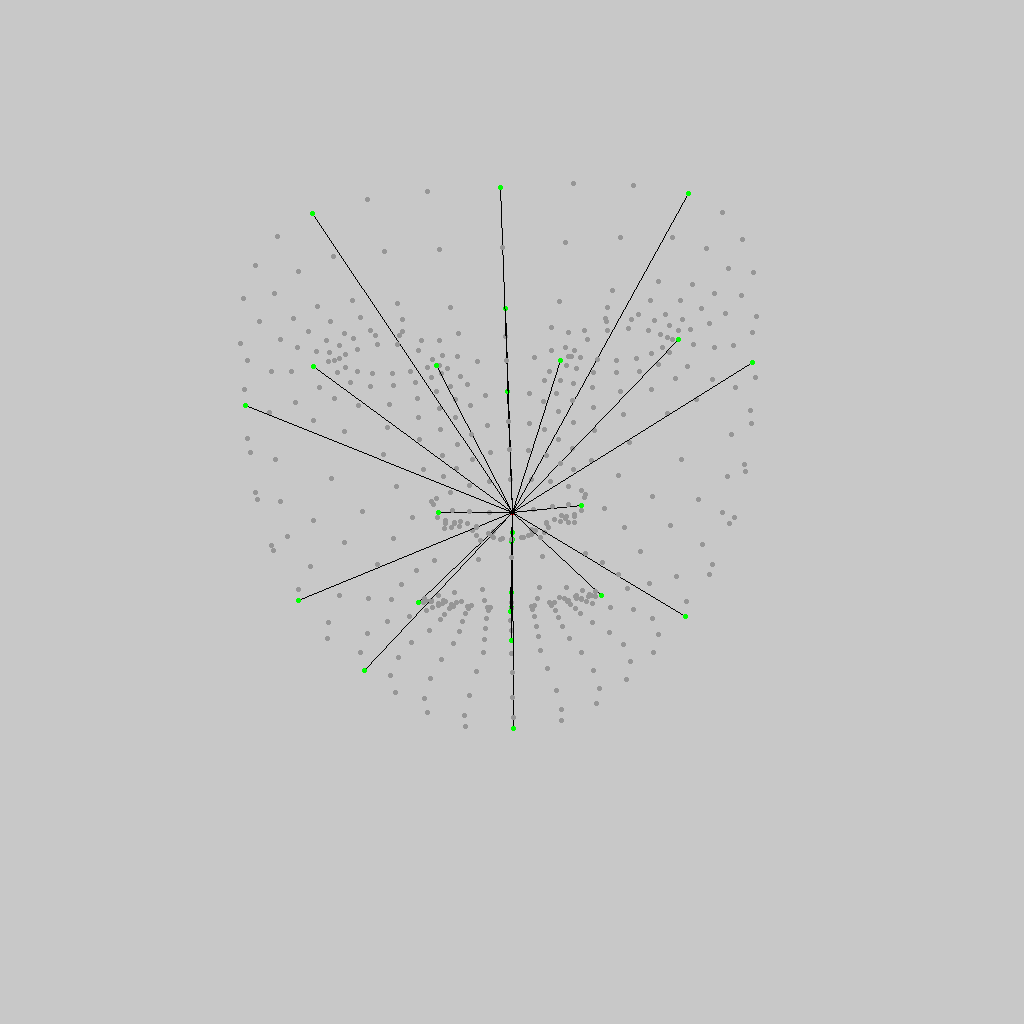

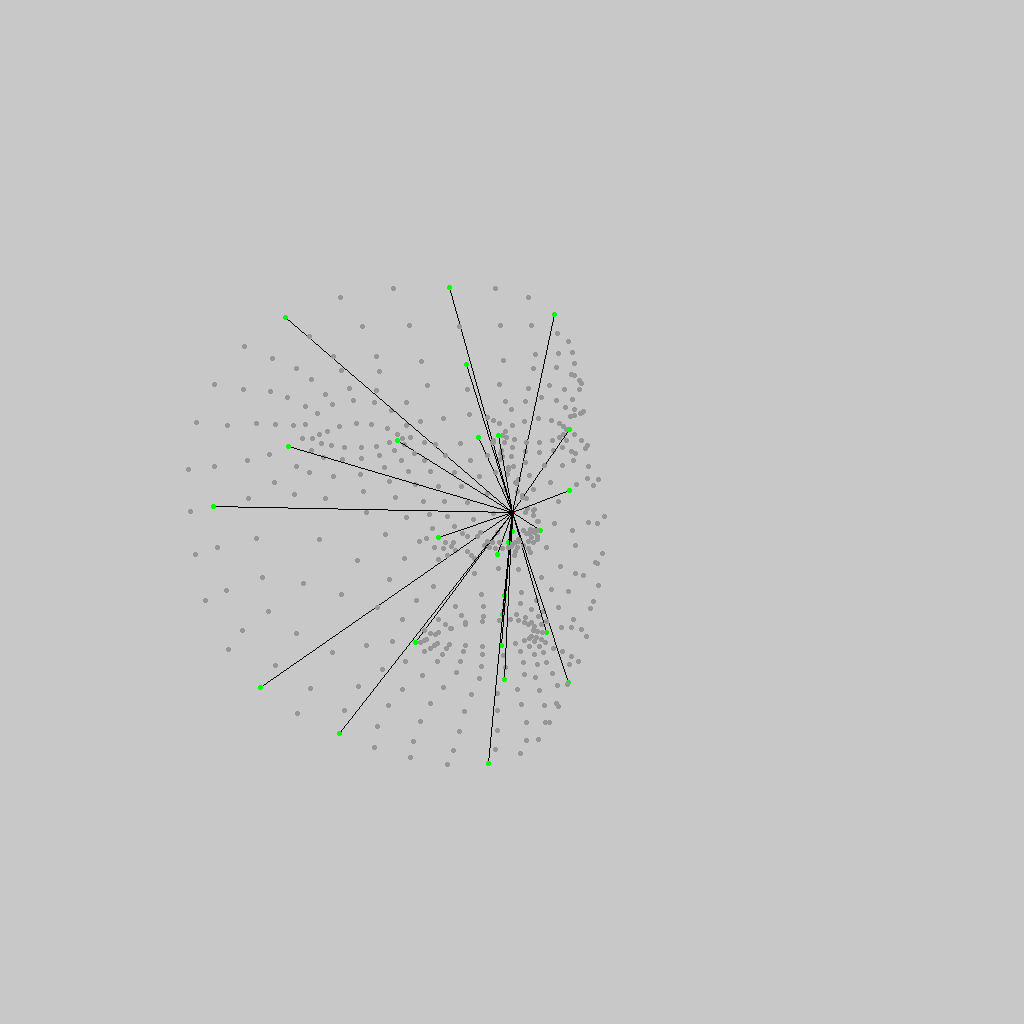

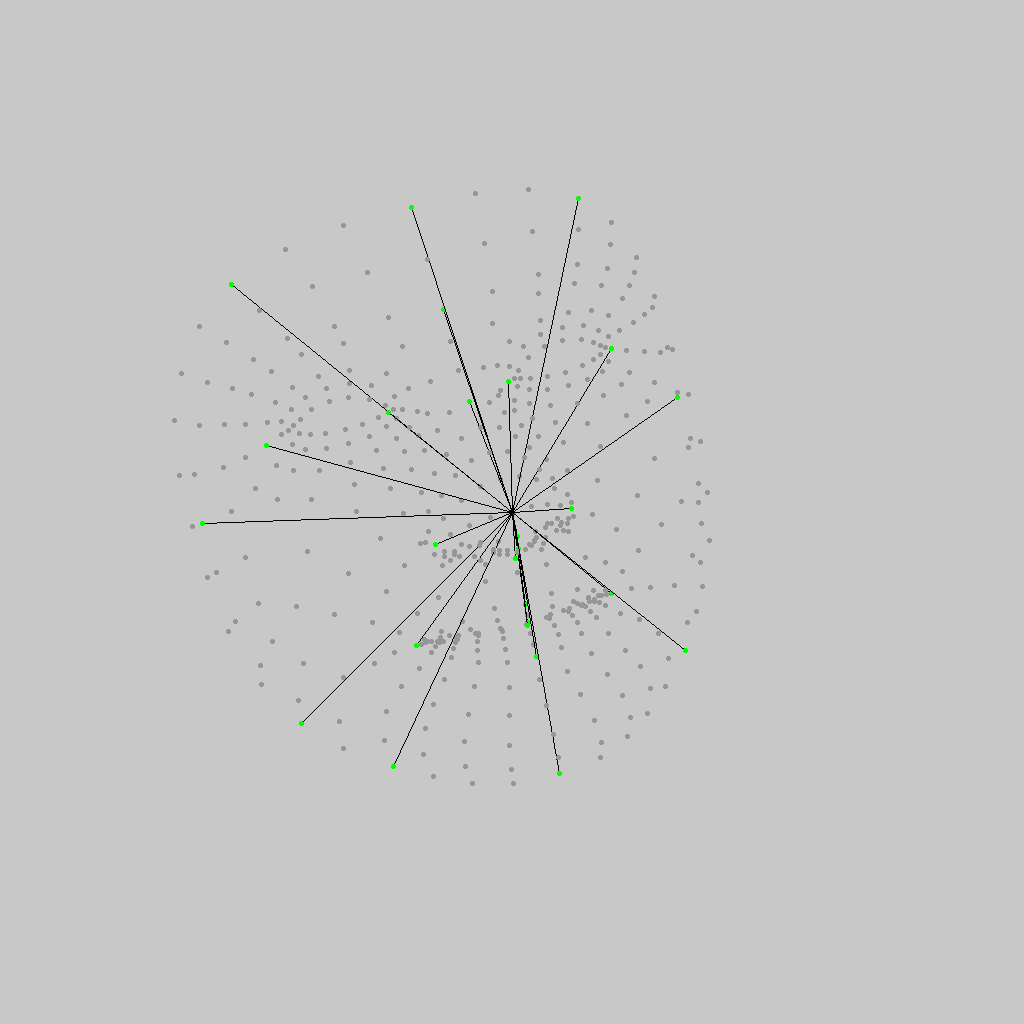

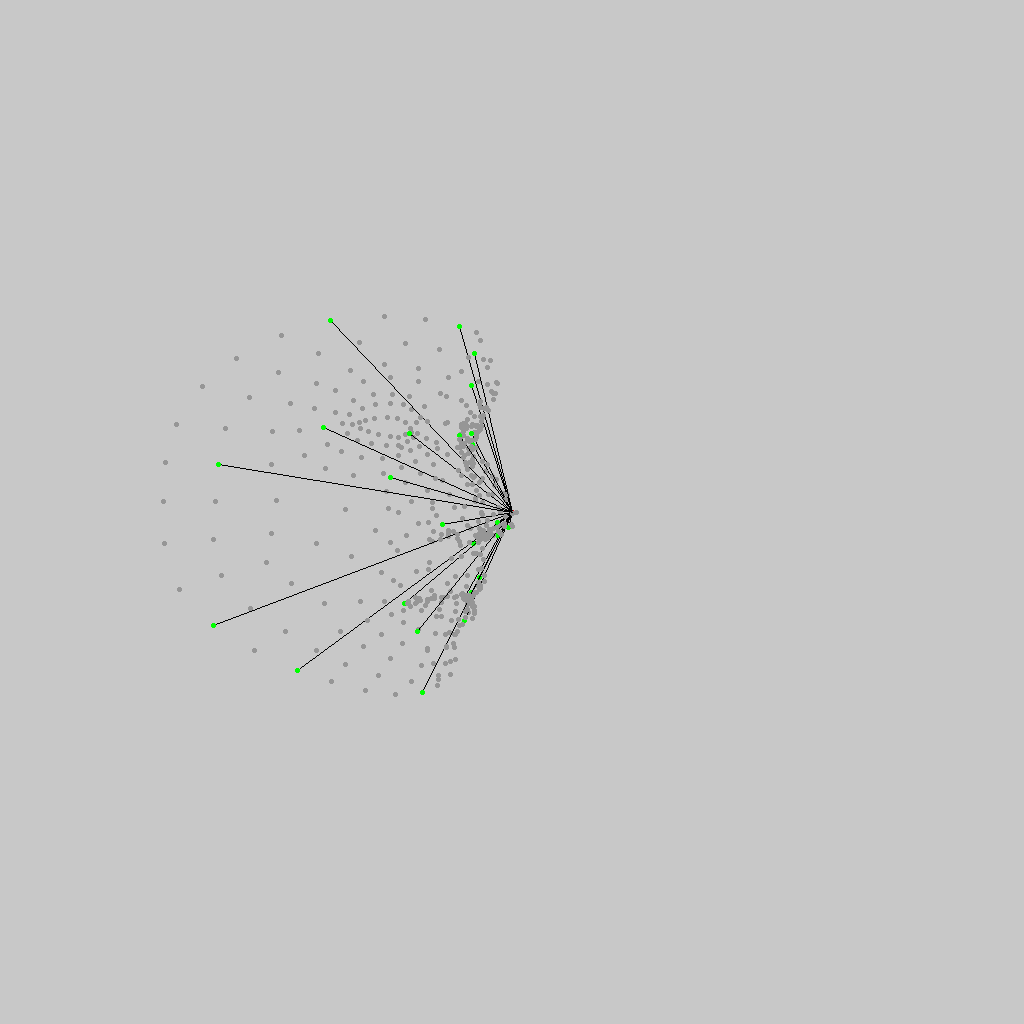

In [ ]:
toKeep = np.array([11, 10, 7, 2, 20, 3, 49, 279, 1, 13, 15, 18, 62, 292, 633, 151, 153, 455, 228, 156, 227, 464, 360, 333, 104, 366, 173])-1
# toKeep = np.arange(0, 468, 1)

for j in range(20):
    lst = []
    for i in df.iloc[j][:-3].index.astype('int'):
        if i % 2 == 0:
            x = df.iloc[j][:-3][i]
        else:
            y = df.iloc[j][:-3][i]
            lst.append([x, y])


    image = np.zeros([1024,1024,3],dtype=np.uint8)
    image.fill(200)

    i = 0

    for landmark in lst:
        x = landmark[0] + .5
        y = landmark[1] + .5
        # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
        shape = image.shape 
        relative_x = int(x * shape[1])
        relative_y = int(y * shape[0])
        # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
        if i == 4:
            cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 0, 255), thickness=2)
        elif i in toKeep:
            cv2.line(image, (relative_x, relative_y), (int(.5* shape[1]), int(.5*shape[0])), color=(0, 0, 0), thickness=1)
            cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
        else:
            cv2.circle(image, (relative_x, relative_y), radius=1, color=(150, 150, 150), thickness=2)
        i += 1
    cv2_imshow(image)

In [ ]:
numsToKeep = list(np.append(toKeep*2, toKeep*2+1)) + [8, 9]

In [ ]:
landmark = df.iloc[:,0:-3]
labels = df.iloc[:,-3:]

## Get the angle from all the points to the nose ##

In [ ]:
# noseXdis = eye_r.x - eye_l.x
# noseYdis = eye_r.y - eye_l.y
# angle   = atan(eyeYdis/eyeXdis)
# degree  = angle*180/CV_PI

# getting the angle from all the points to the nose
for col in df.columns.astype('int')[:-3]:
    if col in numsToKeep:
        if col % 2 != 0:
            df[str(col-1) + ' ' + str(col) + ' angle'] = np.arctan(df[str(col-1)] / df[str(col)]) / (np.pi/2)
            df[str(col-1) + ' ' + str(col) + ' dist'] = df[str(col-1)].abs() / df[str(col)].abs()

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,664 665 angle,664 665 dist,718 719 angle,718 719 dist,730 731 angle,730 731 dist,908 909 angle,908 909 dist,926 927 angle,926 927 dist
0,-0.027139,0.057238,-0.002155,0.014947,-0.026102,0.025360,-0.026159,-0.037238,0.0,0.0,...,-0.030428,0.047833,-0.028170,0.044279,-0.194987,0.316237,0.189437,0.306673,0.216628,0.354050
1,-0.036635,0.054036,-0.007353,0.014895,-0.020548,0.015908,-0.005556,-0.059230,0.0,0.0,...,-0.481360,0.943092,-0.616579,1.454577,0.448148,0.849063,-0.667146,1.735066,-0.328097,0.566435
2,-0.021314,0.076152,-0.001169,0.015774,-0.028779,0.036057,-0.032030,-0.032835,0.0,0.0,...,0.042795,0.067324,0.070433,0.111089,-0.203088,0.330292,0.674597,1.782978,0.334592,0.579990
3,0.053583,0.061476,0.009907,0.016061,0.035446,0.021373,-0.018224,-0.046141,0.0,0.0,...,-0.182117,0.294137,-0.400648,0.728100,0.927311,8.720058,-0.594555,1.351913,-0.172773,0.278257
4,0.025534,0.059084,0.003040,0.017480,0.017327,0.029154,-0.007910,-0.042772,0.0,0.0,...,-0.351421,0.615876,-0.583856,1.305443,0.665345,1.723776,-0.789250,2.909565,-0.341809,0.595241


In [ ]:
df.drop([str(col) for col in range(936)] + ['8 9 angle', '8 9 dist'], axis=1, inplace=True)

In [ ]:
cols_at_end = ['936', '937', '938']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]

In [ ]:
df_pitch = df.drop(['937', '938'], axis=1)
df_yaw = df.drop(['936', '938'], axis=1)
df_roll = df.drop(['936', '937'], axis=1)
print(df_pitch.shape)

(1853, 53)


## Split Data ##

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-3], df.iloc[:,-3:], test_size=0.2, random_state=42)

## Princeple Component Analysis (PCA) ##

In [ ]:
from sklearn.decomposition import PCA

def pca(no_of_components):
  pca_n = PCA(no_of_components)
  pca_n.fit(df.iloc[:,:-3])
  train = pca_n.transform(X_train)
  test = pca_n.transform(X_test)

  return train, test

In [ ]:
x_train_10, x_test_10 = pca(10)
x_train_20, x_test_20 = pca(20)
x_train_30, x_test_30 = pca(30)
x_train_40, x_test_40 = pca(40)

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

def multiLinReg(model, xtrain, ytrain, xtest, ytest):
  mor = MultiOutputRegressor(model).fit(xtrain, ytrain)
  print("Train Score:", mor.score(xtrain, ytrain))
  print("Test Score:", mor.score(xtest, ytest)) 
  return mor

def linReg(xtrain, ytrain, xtest, ytest):
  lr = LinearRegression().fit(xtrain, ytrain)
  print("Train Score:", lr.score(xtrain, ytrain))
  print("Test Score:", lr.score(xtest, ytest))
  return lr


## Train without PCA ##

In [ ]:
multiLinearRegression = multiLinReg(LinearRegression(), X_train, y_train, X_test, y_test)
print("\nPitch:")
reg_linear_pitch = linReg(X_train, y_train.iloc[:,0], X_test, y_test.iloc[:,0])
print("\nYaw:")
reg_linear_yaw = linReg(X_train, y_train.iloc[:,1], X_test, y_test.iloc[:,1])
print("\nRoll:")
reg_linear_roll = linReg(X_train, y_train.iloc[:,2], X_test, y_test.iloc[:,2])

Train Score: 0.5939137620241591
Test Score: -161.54973643349078

Pitch:
Train Score: 0.43395389560222075
Test Score: -453.06606905801766

Yaw:
Train Score: 0.8655797689244344
Test Score: -16.806121908367082

Roll:
Train Score: 0.482207621545822
Test Score: -14.777018334087622


## Train with PCA ##

In [ ]:
print('Using 10 components:')
multiLinearRegression = multiLinReg(LinearRegression(), x_train_10, y_train, x_test_10, y_test)
print("\nPitch:")
reg_linear_pitch = linReg(x_train_10, y_train.iloc[:,0], x_test_10, y_test.iloc[:,0])
print("\nYaw:")
reg_linear_yaw = linReg(x_train_10, y_train.iloc[:,1], x_test_10, y_test.iloc[:,1])
print("\nRoll:")
reg_linear_roll = linReg(x_train_10, y_train.iloc[:,2], x_test_10, y_test.iloc[:,2])

Using 10 components:
Train Score: 0.0378136722740714
Test Score: -288.18239238930755

Pitch:
Train Score: 0.02192716692320351
Test Score: -333.7071877862662

Yaw:
Train Score: 0.03902888699192775
Test Score: -66.84272365026624

Roll:
Train Score: 0.05248496290708293
Test Score: -463.99726573139014


In [ ]:
print('Using 20 components:')
multiLinearRegression = multiLinReg(LinearRegression(), x_train_20, y_train, x_test_20, y_test)
print("\nPitch:")
reg_linear_pitch = linReg(x_train_20, y_train.iloc[:,0], x_test_20, y_test.iloc[:,0])
print("\nYaw:")
reg_linear_yaw = linReg(x_train_20, y_train.iloc[:,1], x_test_20, y_test.iloc[:,1])
print("\nRoll:")
reg_linear_roll = linReg(x_train_20, y_train.iloc[:,2], x_test_20, y_test.iloc[:,2])

Using 20 components:
Train Score: 0.38939870587715175
Test Score: -132.10923101202954

Pitch:
Train Score: 0.14904861740726605
Test Score: -302.1773114628559

Yaw:
Train Score: 0.7599263331769003
Test Score: -39.89714091010227

Roll:
Train Score: 0.25922116704728904
Test Score: -54.25324066313037


In [ ]:
print('Using 30 components:')
multiLinearRegression = multiLinReg(LinearRegression(), x_train_30, y_train, x_test_30, y_test)
print("\nPitch:")
reg_linear_pitch = linReg(x_train_30, y_train.iloc[:,0], x_test_30, y_test.iloc[:,0])
print("\nYaw:")
reg_linear_yaw = linReg(x_train_30, y_train.iloc[:,1], x_test_30, y_test.iloc[:,1])
print("\nRoll:")
reg_linear_roll = linReg(x_train_30, y_train.iloc[:,2], x_test_30, y_test.iloc[:,2])

Using 30 components:
Train Score: 0.47584377574458797
Test Score: -137.35439284025833

Pitch:
Train Score: 0.21846003418888416
Test Score: -330.48540707498466

Yaw:
Train Score: 0.8127322780170181
Test Score: -9.07499988932925

Roll:
Train Score: 0.3963390150278616
Test Score: -72.50277155646108


In [ ]:
print('Using 40 components:')
multiLinearRegression = multiLinReg(LinearRegression(), x_train_40, y_train, x_test_40, y_test)
print("\nPitch:")
reg_linear_pitch = linReg(x_train_40, y_train.iloc[:,0], x_test_40, y_test.iloc[:,0])
print("\nYaw:")
reg_linear_yaw = linReg(x_train_40, y_train.iloc[:,1], x_test_40, y_test.iloc[:,1])
print("\nRoll:")
reg_linear_roll = linReg(x_train_40, y_train.iloc[:,2], x_test_40, y_test.iloc[:,2])

Using 40 components:
Train Score: 0.5746063652763499
Test Score: -151.58850669638278

Pitch:
Train Score: 0.41114245156186924
Test Score: -428.05140672656535

Yaw:
Train Score: 0.856038277459777
Test Score: -16.401952469619616

Roll:
Train Score: 0.4566383668074032
Test Score: -10.312160892963322


## Polynomial Regression ##

In [ ]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    poly = PolynomialFeatures(polyDegree, include_bias=False)
    X = poly.fit_transform(X)
    return X
# X_train_poly=addPoly(X_train,2)
# X_test_poly=addPoly(X_test,2)

In [ ]:
multiPolyRegression = multiLinReg(LinearRegression(), addPoly(X_train, 2), y_train, addPoly(X_test, 2), y_test)
print("\nPitch:")
reg_poly_pitch = linReg(addPoly(X_train, 2), y_train.iloc[:,0], addPoly(X_test, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_poly_yaw = linReg(addPoly(X_train, 2), y_train.iloc[:,1], addPoly(X_test, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_poly_roll = linReg(addPoly(X_train, 2), y_train.iloc[:,2], addPoly(X_test, 2), y_test.iloc[:,2])

Train Score: 0.9993568746420495
Test Score: -93263131821418.0

Pitch:
Train Score: 0.9994841260346834
Test Score: -6803990146270.082

Yaw:
Train Score: 0.9989523770478416
Test Score: -3383770892718.0986

Roll:
Train Score: 0.9996341208436235
Test Score: -269601634425265.8


In [ ]:
print('Using 10 components:')
multiPolyRegression = multiLinReg(LinearRegression(), addPoly(x_train_10, 2), y_train, addPoly(x_test_10, 2), y_test)
print("\nPitch:")
reg_poly_pitch = linReg(addPoly(x_train_10, 2), y_train.iloc[:,0], addPoly(x_test_10, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_poly_yaw = linReg(addPoly(x_train_10, 2), y_train.iloc[:,1], addPoly(x_test_10, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_poly_roll = linReg(addPoly(x_train_10, 2), y_train.iloc[:,2], addPoly(x_test_10, 2), y_test.iloc[:,2])

Using 10 components:
Train Score: 0.37326978115376885
Test Score: -969655747.1763989

Pitch:
Train Score: 0.13640724831929651
Test Score: -649973437.4668454

Yaw:
Train Score: 0.6076053023362347
Test Score: -32158641.10996377

Roll:
Train Score: 0.3757967928057754
Test Score: -2226835162.9523873


In [ ]:
print('Using 20 components:')
multiPolyRegression = multiLinReg(LinearRegression(), addPoly(x_train_20, 2), y_train, addPoly(x_test_20, 2), y_test)
print("\nPitch:")
reg_poly_pitch = linReg(addPoly(x_train_20, 2), y_train.iloc[:,0], addPoly(x_test_20, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_poly_yaw = linReg(addPoly(x_train_20, 2), y_train.iloc[:,1], addPoly(x_test_20, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_poly_roll = linReg(addPoly(x_train_20, 2), y_train.iloc[:,2], addPoly(x_test_20, 2), y_test.iloc[:,2])

Using 20 components:
Train Score: 0.9269598965934791
Test Score: -347831659.020164

Pitch:
Train Score: 0.9060128509482854
Test Score: -166331360.5126836

Yaw:
Train Score: 0.9310316163987994
Test Score: -65928290.415588155

Roll:
Train Score: 0.9438352224333526
Test Score: -811235326.1322203


In [ ]:
print('Using 30 components:')
multiLinearRegression = multiLinReg(LinearRegression(), addPoly(x_train_30, 2), y_train, addPoly(x_test_30, 2), y_test)
print("\nPitch:")
reg_poly_pitch = linReg(addPoly(x_train_30, 2), y_train.iloc[:,0], addPoly(x_test_30, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_poly_yaw = linReg(addPoly(x_train_30, 2), y_train.iloc[:,1], addPoly(x_test_30, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_poly_roll = linReg(addPoly(x_train_30, 2), y_train.iloc[:,2], addPoly(x_test_30, 2), y_test.iloc[:,2])

Using 30 components:
Train Score: 0.956842646307645
Test Score: -19446513000.410004

Pitch:
Train Score: 0.9500870576127576
Test Score: -32255725115.180454

Yaw:
Train Score: 0.9564559982210381
Test Score: -6580161612.867991

Roll:
Train Score: 0.9639848830891392
Test Score: -19503652273.18157


In [ ]:
print('Using 40 components:')
multiLinearRegression = multiLinReg(LinearRegression(), addPoly(x_train_40, 2), y_train, addPoly(x_test_40, 2), y_test)
print("\nPitch:")
reg_linear_pitch = linReg(addPoly(x_train_40, 2), y_train.iloc[:,0], addPoly(x_test_40, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_linear_yaw = linReg(addPoly(x_train_40, 2), y_train.iloc[:,1], addPoly(x_test_40, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_linear_roll = linReg(addPoly(x_train_40, 2), y_train.iloc[:,2], addPoly(x_test_40, 2), y_test.iloc[:,2])

Using 40 components:
Train Score: 0.9812354062451724
Test Score: -1229949293440.7603

Pitch:
Train Score: 0.9816635825314393
Test Score: -3084004451962.5474

Yaw:
Train Score: 0.9785713089856052
Test Score: -143383987140.91064

Roll:
Train Score: 0.9834713272184726
Test Score: -462459441218.8228


## Lasso Regression ##

In [ ]:
def lasReg(xtrain, ytrain, xtest, ytest):
  lr = linear_model.Lasso(.1, normalize=True).fit(xtrain, ytrain)
  print("Train Score:", lr.score(xtrain, ytrain))
  print("Test Score:", lr.score(xtest, ytest))
  return lr

### Without PCA ###

In [ ]:
# Lasso Regression
from sklearn import linear_model
print('without PCA:')
multiLasReg = multiLinReg(linear_model.Lasso(.1, normalize=True), addPoly(X_train, 2), y_train, addPoly(X_test, 2), y_test)
print("\nPitch:")
reg_las_pitch = lasReg(addPoly(X_train, 2), y_train.iloc[:,0], addPoly(X_test, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_las_yaw = lasReg(addPoly(X_train, 2), y_train.iloc[:,1], addPoly(X_test, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_las_roll = lasReg(addPoly(X_train, 2), y_train.iloc[:,2], addPoly(X_test, 2), y_test.iloc[:,2])

without PCA:
Train Score: 0.0
Test Score: -0.003324522508095192

Pitch:
Train Score: 0.0
Test Score: -0.0014183399321547885

Yaw:
Train Score: 0.0
Test Score: -0.001857331466436074

Roll:
Train Score: 0.0
Test Score: -0.006697896125694713


### With PCA ###

In [ ]:
print('10 components:')
multiLasRegression = multiLinReg(linear_model.Lasso(.1, normalize=True), addPoly(x_train_10, 2), y_train, addPoly(x_test_10, 2), y_test)
print("\nPitch:")
reg_las_pitch = lasReg(addPoly(x_train_10, 2), y_train.iloc[:,0], addPoly(x_test_10, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_las_yaw = lasReg(addPoly(x_train_10, 2), y_train.iloc[:,1], addPoly(x_test_10, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_las_roll = lasReg(addPoly(x_train_10, 2), y_train.iloc[:,2], addPoly(x_test_10, 2), y_test.iloc[:,2])

10 components:
Train Score: 0.0
Test Score: -0.003324522508095192

Pitch:
Train Score: 0.0
Test Score: -0.0014183399321547885

Yaw:
Train Score: 0.0
Test Score: -0.001857331466436074

Roll:
Train Score: 0.0
Test Score: -0.006697896125694713


In [ ]:
print('20 components:')
multiLasRegression = multiLinReg(linear_model.Lasso(.1, normalize=True), addPoly(x_train_20, 2), y_train, addPoly(x_test_20, 2), y_test)
print("\nPitch:")
reg_las_pitch = lasReg(addPoly(x_train_20, 2), y_train.iloc[:,0], addPoly(x_test_20, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_las_yaw = lasReg(addPoly(x_train_20, 2), y_train.iloc[:,1], addPoly(x_test_20, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_las_roll = lasReg(addPoly(x_train_20, 2), y_train.iloc[:,2], addPoly(x_test_20, 2), y_test.iloc[:,2])

20 components:
Train Score: 0.0
Test Score: -0.003324522508095192

Pitch:
Train Score: 0.0
Test Score: -0.0014183399321547885

Yaw:
Train Score: 0.0
Test Score: -0.001857331466436074

Roll:
Train Score: 0.0
Test Score: -0.006697896125694713


In [ ]:
print('30 components:')
multiLasRegression = multiLinReg(linear_model.Lasso(.1, normalize=True), addPoly(x_train_30, 2), y_train, addPoly(x_test_30, 2), y_test)
print("\nPitch:")
reg_las_pitch = lasReg(addPoly(x_train_30, 2), y_train.iloc[:,0], addPoly(x_test_30, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_las_yaw = lasReg(addPoly(x_train_30, 2), y_train.iloc[:,1], addPoly(x_test_30, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_las_roll = lasReg(addPoly(x_train_30, 2), y_train.iloc[:,2], addPoly(x_test_30, 2), y_test.iloc[:,2])

30 components:
Train Score: 0.0
Test Score: -0.003324522508095192

Pitch:
Train Score: 0.0
Test Score: -0.0014183399321547885

Yaw:
Train Score: 0.0
Test Score: -0.001857331466436074

Roll:
Train Score: 0.0
Test Score: -0.006697896125694713


In [ ]:
print('40 components:')
multiLasRegression = multiLinReg(linear_model.Lasso(.1, normalize=True), addPoly(x_train_40, 2), y_train, addPoly(x_test_40, 2), y_test)
print("\nPitch:")
reg_las_pitch = lasReg(addPoly(x_train_40, 2), y_train.iloc[:,0], addPoly(x_test_40, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_las_yaw = lasReg(addPoly(x_train_40, 2), y_train.iloc[:,1], addPoly(x_test_40, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_las_roll = lasReg(addPoly(x_train_40, 2), y_train.iloc[:,2], addPoly(x_test_40, 2), y_test.iloc[:,2])

40 components:
Train Score: 0.0
Test Score: -0.003324522508095192

Pitch:
Train Score: 0.0
Test Score: -0.0014183399321547885

Yaw:
Train Score: 0.0
Test Score: -0.001857331466436074

Roll:
Train Score: 0.0
Test Score: -0.006697896125694713


In [ ]:
new_X_train_10, new_X_test_10 = pca(10)
new_X_train_20, new_X_test_20 = pca(20)
new_X_train_30, new_X_test_30 = pca(30)
new_X_train_40, new_X_test_40 = pca(40)

## Ridge Regression ##

In [ ]:
def ridReg(xtrain, ytrain, xtest, ytest):
  rr = linear_model.Ridge(.1, normalize=True).fit(xtrain, ytrain)
  print("Train Score:", rr.score(xtrain, ytrain))
  print("Test Score:", rr.score(xtest, ytest))
  return rr

In [ ]:
# without PCA
print('without PCA:')
multiRidReg = multiLinReg(linear_model.Ridge(.1, normalize=True), addPoly(X_train, 2), y_train, addPoly(X_test, 2), y_test)
print("\nPitch:")
reg_Rid_pitch = ridReg(addPoly(X_train, 2), y_train.iloc[:,0], addPoly(X_test, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_Rid_yaw = ridReg(addPoly(X_train, 2), y_train.iloc[:,1], addPoly(X_test, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_Rid_roll = ridReg(addPoly(X_train, 2), y_train.iloc[:,2], addPoly(X_test, 2), y_test.iloc[:,2])
print('\n==============================================')

# with PCA
print('10 components:')
multiLasRegression = multiLinReg(linear_model.Lasso(.1, normalize=True), addPoly(x_train_10, 2), y_train, addPoly(x_test_10, 2), y_test)
print("\nPitch:")
reg_Rid_pitch = ridReg(addPoly(x_train_10, 2), y_train.iloc[:,0], addPoly(x_test_10, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_Rid_yaw = ridReg(addPoly(x_train_10, 2), y_train.iloc[:,1], addPoly(x_test_10, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_Rid_roll = ridReg(addPoly(x_train_10, 2), y_train.iloc[:,2], addPoly(x_test_10, 2), y_test.iloc[:,2])
print('\n==============================================')
print('20 components:')
multiLasRegression = multiLinReg(linear_model.Lasso(.1, normalize=True), addPoly(x_train_20, 2), y_train, addPoly(x_test_20, 2), y_test)
print("\nPitch:")
reg_Rid_pitch = ridReg(addPoly(x_train_20, 2), y_train.iloc[:,0], addPoly(x_test_20, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_Rid_yaw = ridReg(addPoly(x_train_20, 2), y_train.iloc[:,1], addPoly(x_test_20, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_Rid_roll = ridReg(addPoly(x_train_20, 2), y_train.iloc[:,2], addPoly(x_test_20, 2), y_test.iloc[:,2])
print('\n==============================================')
print('30 components:')
multiLasRegression = multiLinReg(linear_model.Lasso(.1, normalize=True), addPoly(x_train_30, 2), y_train, addPoly(x_test_30, 2), y_test)
print("\nPitch:")
reg_Rid_pitch = ridReg(addPoly(x_train_30, 2), y_train.iloc[:,0], addPoly(x_test_30, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_Rid_yaw = ridReg(addPoly(x_train_30, 2), y_train.iloc[:,1], addPoly(x_test_30, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_Rid_roll = ridReg(addPoly(x_train_30, 2), y_train.iloc[:,2], addPoly(x_test_30, 2), y_test.iloc[:,2])
print('\n==============================================')
print('40 components:')
multiLasRegression = multiLinReg(linear_model.Lasso(.1, normalize=True), addPoly(x_train_40, 2), y_train, addPoly(x_test_40, 2), y_test)
print("\nPitch:")
reg_Rid_pitch = ridReg(addPoly(x_train_40, 2), y_train.iloc[:,0], addPoly(x_test_40, 2), y_test.iloc[:,0])
print("\nYaw:")
reg_Rid_yaw = ridReg(addPoly(x_train_40, 2), y_train.iloc[:,1], addPoly(x_test_40, 2), y_test.iloc[:,1])
print("\nRoll:")
reg_Rid_roll = ridReg(addPoly(x_train_40, 2), y_train.iloc[:,2], addPoly(x_test_40, 2), y_test.iloc[:,2])

without PCA:
Train Score: 0.926203167935619
Test Score: -43223.681744771544

Pitch:
Train Score: 0.906918717348329
Test Score: -109490.02820954274

Yaw:
Train Score: 0.9308841041187849
Test Score: -236.09838884318435

Roll:
Train Score: 0.9408066823397431
Test Score: -19944.918635928712

10 components:
Train Score: 0.0
Test Score: -0.003324522508095192

Pitch:
Train Score: 0.057720740840061735
Test Score: -8790926.18404501

Yaw:
Train Score: 0.13482068992350715
Test Score: -4355079.83369639

Roll:
Train Score: 0.15269821425163732
Test Score: -2806161.897675603

20 components:
Train Score: 0.0
Test Score: -0.003324522508095192

Pitch:
Train Score: 0.4612976920235886
Test Score: -790104.0011042642

Yaw:
Train Score: 0.8473716905020923
Test Score: -5252115.436866247

Roll:
Train Score: 0.6976979412892799
Test Score: -6856591.168243806

30 components:
Train Score: 0.0
Test Score: -0.003324522508095192

Pitch:
Train Score: 0.8693129928181443
Test Score: -2722.868146612701

Yaw:
Train Score:

## SVR ##

In [ ]:
def svReg(xtrain, ytrain, xtest, ytest):
  svr = SVR(kernel='poly', degree=2, coef0=1, epsilon=.7)
  sr = svr.fit(xtrain, ytrain)
  print("Train Score:", sr.score(xtrain, ytrain))
  print("Test Score:", sr.score(xtest, ytest))
  return sr

In [ ]:
# SVR
from sklearn.svm import SVR
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

print('without PCA:')
multiSvReg = multiLinReg(SVR(kernel='poly', degree=2, coef0=1, epsilon=.7), scaler.fit_transform(X_train), y_train, scaler.fit_transform(X_test), y_test)
print("\nPitch:")
reg_svr_pitch = svReg(scaler.fit_transform(X_train), y_train.iloc[:,0], scaler.fit_transform(X_test), y_test.iloc[:,0])
print("\nYaw:")
reg_svr_yaw = svReg(scaler.fit_transform(X_train), y_train.iloc[:,1], scaler.fit_transform(X_test), y_test.iloc[:,1])
print("\nRoll:")
reg_svr_roll = svReg(scaler.fit_transform(X_train), y_train.iloc[:,2], scaler.fit_transform(X_test), y_test.iloc[:,2])
print('\n==============================================')

without PCA:
Train Score: 0.6671005264343451
Test Score: -1.7636774910337571

Pitch:
Train Score: 0.689578910504123
Test Score: -3.7967988204374823

Yaw:
Train Score: 0.5374585111549867
Test Score: 0.32566082117779094

Roll:
Train Score: 0.774264157643926
Test Score: -1.8198944738415794



In [ ]:
# SVR
from sklearn.svm import SVR
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
svr = SVR(kernel='poly', degree=2, coef0=1, epsilon=.7)


print('without PCA:')


reg_svr_multi = MultiOutputRegressor(svr).fit(scaler.fit_transform(X_train), y_train)
print("Train Score:", reg_svr_multi.score(scaler.fit_transform(X_train), y_train))
print(reg_svr_multi.score(scaler.transform(X_test), y_test))

reg_svr_pitch = svr.fit(scaler.fit_transform(X_train), y_train.iloc[:,0])
print("Train Score:", reg_svr_pitch.score(scaler.fit_transform(X_train), y_train.iloc[:,0]))
print(reg_svr_pitch.score(scaler.transform(X_test), y_test.iloc[:,0]))

reg_svr_yaw = svr.fit(scaler.fit_transform(X_train), y_train.iloc[:,1])
print("Train Score:", reg_svr_yaw.score(scaler.fit_transform(X_train), y_train.iloc[:,1]))
print(reg_svr_yaw.score(scaler.transform(X_test), y_test.iloc[:,1]))

reg_svr_roll = svr.fit(scaler.fit_transform(X_train), y_train.iloc[:,2])
print("Train Score:", reg_svr_roll.score(scaler.fit_transform(X_train), y_train.iloc[:,2]))
print(reg_svr_roll.score(scaler.transform(X_test), y_test.iloc[:,2]))

# w/ PCA

print('\n10 components:')

reg_svr_multi = MultiOutputRegressor(svr).fit(scaler.fit_transform(new_X_train_10), y_train)
print("Train Score:", reg_svr_multi.score(scaler.fit_transform(new_X_train_10), y_train))
print("Test Score:", reg_svr_multi.score(scaler.transform(new_X_test_10), y_test))

reg_svr_pitch = svr.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,0])
print("Train Score:", reg_svr_pitch.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,0]))
print("Test Score:", reg_svr_pitch.score(scaler.transform(new_X_test_10), y_test.iloc[:,0]))

reg_svr_yaw = svr.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,1])
print("Train Score:", reg_svr_yaw.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,1]))
print("Test Score:", reg_svr_yaw.score(scaler.transform(new_X_test_10), y_test.iloc[:,1]))

reg_svr_roll = svr.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,2])
print("Train Score:", reg_svr_roll.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,2]))
print("Test Score:", reg_svr_roll.score(scaler.transform(new_X_test_10), y_test.iloc[:,2]))

print('\n20 components:')

reg_svr_multi = MultiOutputRegressor(svr).fit(scaler.fit_transform(new_X_train_20), y_train)
print("Train Score:", reg_svr_multi.score(scaler.fit_transform(new_X_train_20), y_train))
print("Test Score:", reg_svr_multi.score(scaler.transform(new_X_test_20), y_test))

reg_svr_pitch = svr.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,0])
print("Train Score:", reg_svr_pitch.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,0]))
print("Test Score:", reg_svr_pitch.score(scaler.transform(new_X_test_20), y_test.iloc[:,0]))

reg_svr_yaw = svr.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,1])
print("Train Score:", reg_svr_yaw.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,1]))
print("Test Score:", reg_svr_yaw.score(scaler.transform(new_X_test_20), y_test.iloc[:,1]))

reg_svr_roll = svr.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,2])
print("Train Score:", reg_svr_roll.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,2]))
print("Test Score:", reg_svr_roll.score(scaler.transform(new_X_test_20), y_test.iloc[:,2]))

print('\n30 components:')

reg_svr_multi = MultiOutputRegressor(svr).fit(scaler.fit_transform(new_X_train_30), y_train)
print("Train Score:", reg_svr_multi.score(scaler.fit_transform(new_X_train_30), y_train))
print("Test Score:", reg_svr_multi.score(scaler.transform(new_X_test_30), y_test))

reg_svr_pitch = svr.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,0])
print("Train Score:", reg_svr_pitch.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,0]))
print("Test Score:", reg_svr_pitch.score(scaler.transform(new_X_test_30), y_test.iloc[:,0]))

reg_svr_yaw = svr.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,1])
print("Train Score:", reg_svr_yaw.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,1]))
print("Test Score:", reg_svr_yaw.score(scaler.transform(new_X_test_30), y_test.iloc[:,1]))

reg_svr_roll = svr.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,2])
print("Train Score:", reg_svr_roll.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,2]))
print("Test Score:", reg_svr_roll.score(scaler.transform(new_X_test_30), y_test.iloc[:,2]))

print('\n40 components:')

reg_svr_multi = MultiOutputRegressor(svr).fit(scaler.fit_transform(new_X_train_40), y_train)
print("Train Score:", reg_svr_multi.score(scaler.fit_transform(new_X_train_40), y_train))
print("Test Score:", reg_svr_multi.score(scaler.transform(new_X_test_40), y_test))

reg_svr_pitch = svr.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,0])
print("Train Score:", reg_svr_pitch.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,0]))
print("Test Score:", reg_svr_pitch.score(scaler.transform(new_X_test_40), y_test.iloc[:,0]))

reg_svr_yaw = svr.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,1])
print("Train Score:", reg_svr_yaw.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,1]))
print("Test Score:", reg_svr_yaw.score(scaler.transform(new_X_test_40), y_test.iloc[:,1]))

reg_svr_roll = svr.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,2])
print("Train Score:", reg_svr_roll.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,2]))
print("Test Score:", reg_svr_roll.score(scaler.transform(new_X_test_40), y_test.iloc[:,2]))

without PCA:
Train Score: 0.6671005264343451
-41053.76431536378
Train Score: 0.689578910504123
-34158.77879799324
Train Score: 0.5374585111549867
-2018.3661589055303
Train Score: 0.774264157643926
-86984.14798919256

10 components:
Train Score: 0.09920492014758131
Test Score: -110178831.66930671
Train Score: 0.05099151376321087
Test Score: -121163879.72613506
Train Score: 0.174560044983472
Test Score: -50245884.50143376
Train Score: 0.07206320169606106
Test Score: -159126730.78035137

20 components:
Train Score: 0.49512707565991493
Test Score: -238723.03215784067
Train Score: 0.33913780094832624
Test Score: -163179.88777008894
Train Score: 0.6915430261350295
Test Score: -14898.38746474783
Train Score: 0.454700399896389
Test Score: -538090.8212386853

30 components:
Train Score: 0.6651675799373561
Test Score: -91572.02682125742
Train Score: 0.7086818629497844
Test Score: -237666.42532155188
Train Score: 0.49969929452745565
Test Score: -2632.19031075891
Train Score: 0.787121582334828
Tes

## Decision Tree Regressor ##

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5)

print('without PCA:')

reg_dt_multi = MultiOutputRegressor(dt).fit(scaler.fit_transform(X_train), y_train)
print(reg_dt_multi.score(scaler.fit_transform(X_train), y_train))
print(reg_dt_multi.score(scaler.transform(X_test), y_test))

reg_dt_pitch = dt.fit(scaler.fit_transform(X_train), y_train.iloc[:,0])
print(reg_dt_pitch.score(scaler.fit_transform(X_train), y_train.iloc[:,0]))
print(reg_dt_pitch.score(scaler.transform(X_test), y_test.iloc[:,0]))

reg_dt_yaw = dt.fit(scaler.fit_transform(X_train), y_train.iloc[:,1])
print(reg_dt_yaw.score(scaler.fit_transform(X_train), y_train.iloc[:,1]))
print(reg_dt_yaw.score(scaler.transform(X_test), y_test.iloc[:,1]))

reg_dt_roll = dt.fit(scaler.fit_transform(X_train), y_train.iloc[:,2])
print(reg_dt_roll.score(scaler.fit_transform(X_train), y_train.iloc[:,2]))
print(reg_dt_roll.score(scaler.transform(X_test), y_test.iloc[:,2]))

# w/ PCA

print('\n10 components:')

reg_dt_multi = MultiOutputRegressor(dt).fit(scaler.fit_transform(new_X_train_10), y_train)
print(reg_dt_multi.score(scaler.fit_transform(new_X_train_10), y_train))
print(reg_dt_multi.score(scaler.transform(new_X_test_10), y_test))

reg_dt_pitch = dt.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,0])
print(reg_dt_pitch.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,0]))
print(reg_dt_pitch.score(scaler.transform(new_X_test_10), y_test.iloc[:,0]))

reg_dt_yaw = dt.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,1])
print(reg_dt_yaw.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,1]))
print(reg_dt_yaw.score(scaler.transform(new_X_test_10), y_test.iloc[:,1]))

reg_dt_roll = dt.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,2])
print(reg_dt_roll.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,2]))
print(reg_dt_roll.score(scaler.transform(new_X_test_10), y_test.iloc[:,2]))

print('\n20 components:')

reg_dt_multi = MultiOutputRegressor(dt).fit(scaler.fit_transform(new_X_train_20), y_train)
print(reg_dt_multi.score(scaler.fit_transform(new_X_train_20), y_train))
print(reg_dt_multi.score(scaler.transform(new_X_test_20), y_test))

reg_dt_pitch = dt.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,0])
print(reg_dt_pitch.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,0]))
print(reg_dt_pitch.score(scaler.transform(new_X_test_20), y_test.iloc[:,0]))

reg_dt_yaw = dt.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,1])
print(reg_dt_yaw.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,1]))
print(reg_dt_yaw.score(scaler.transform(new_X_test_20), y_test.iloc[:,1]))

reg_dt_roll = dt.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,2])
print(reg_dt_roll.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,2]))
print(reg_dt_roll.score(scaler.transform(new_X_test_20), y_test.iloc[:,2]))

print('\n30 components:')

reg_dt_multi = MultiOutputRegressor(dt).fit(scaler.fit_transform(new_X_train_30), y_train)
print(reg_dt_multi.score(scaler.fit_transform(new_X_train_30), y_train))
print(reg_dt_multi.score(scaler.transform(new_X_test_30), y_test))

reg_dt_pitch = dt.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,0])
print(reg_dt_pitch.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,0]))
print(reg_dt_pitch.score(scaler.transform(new_X_test_30), y_test.iloc[:,0]))

reg_dt_yaw = dt.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,1])
print(reg_dt_yaw.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,1]))
print(reg_dt_yaw.score(scaler.transform(new_X_test_30), y_test.iloc[:,1]))

reg_dt_roll = dt.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,2])
print(reg_dt_roll.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,2]))
print(reg_dt_roll.score(scaler.transform(new_X_test_30), y_test.iloc[:,2]))

print('\n40 components:')

reg_dt_multi = MultiOutputRegressor(dt).fit(scaler.fit_transform(new_X_train_40), y_train)
print(reg_dt_multi.score(scaler.fit_transform(new_X_train_40), y_train))
print(reg_dt_multi.score(scaler.transform(new_X_test_40), y_test))

reg_dt_pitch = dt.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,0])
print(reg_dt_pitch.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,0]))
print(reg_dt_pitch.score(scaler.transform(new_X_test_40), y_test.iloc[:,0]))

reg_dt_yaw = dt.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,1])
print(reg_dt_yaw.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,1]))
print(reg_dt_yaw.score(scaler.transform(new_X_test_40), y_test.iloc[:,1]))

reg_dt_roll = dt.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,2])
print(reg_dt_roll.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,2]))
print(reg_dt_roll.score(scaler.transform(new_X_test_40), y_test.iloc[:,2]))

without PCA:
0.907084673702145
0.41749584110960153
0.8548643226815584
0.2261610446250859
0.9192507378873046
0.8924841682094485
0.9471389605375722
0.16443129462528983

10 components:
0.8533347733084421
-2.076807867588873
0.8526150994725085
0.28776873645001766
0.8091168032296919
0.6528472539727395
0.8982724172231259
0.4817155645435427

20 components:
0.8874561576790202
-1.222158934333122
0.855705274384843
-5.022211916819209
0.8929028596885
0.8276199880221519
0.9137603389637174
0.5281151257976917

30 components:
0.8922033877376644
-2.495360566884512
0.8578170463016792
-5.003629413047062
0.8929595533383097
0.8260524671094085
0.9258335635730043
0.5221073703998962

40 components:
0.8772108973412478
0.5279646575020847
0.8555047661964507
0.3111331041549251
0.8972646821290801
0.8206028669737309
0.8788632436982127
0.4521580013775979


## Random Forest Regressor ##

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=5, max_depth=1)

print('without PCA:')

reg_random_forest_multi = MultiOutputRegressor(random_forest).fit(scaler.fit_transform(X_train), y_train)
print(reg_random_forest_multi.score(scaler.fit_transform(X_train), y_train))
print(reg_random_forest_multi.score(scaler.transform(X_test), y_test))

reg_random_forest_pitch = random_forest.fit(scaler.fit_transform(X_train), y_train.iloc[:,0])
print(reg_random_forest_pitch.score(scaler.fit_transform(X_train), y_train.iloc[:,0]))
print(reg_random_forest_pitch.score(scaler.transform(X_test), y_test.iloc[:,0]))

reg_random_forest_yaw = random_forest.fit(scaler.fit_transform(X_train), y_train.iloc[:,1])
print(reg_random_forest_yaw.score(scaler.fit_transform(X_train), y_train.iloc[:,1]))
print(reg_random_forest_yaw.score(scaler.transform(X_test), y_test.iloc[:,1]))

reg_random_forest_roll = random_forest.fit(scaler.fit_transform(X_train), y_train.iloc[:,2])
print(reg_random_forest_roll.score(scaler.fit_transform(X_train), y_train.iloc[:,2]))
print(reg_random_forest_roll.score(scaler.transform(X_test), y_test.iloc[:,2]))

# w/ PCA

print('\n10 components:')

reg_random_forest_multi = MultiOutputRegressor(random_forest).fit(scaler.fit_transform(new_X_train_10), y_train)
print(reg_random_forest_multi.score(scaler.fit_transform(new_X_train_10), y_train))
print(reg_random_forest_multi.score(scaler.transform(new_X_test_10), y_test))

reg_random_forest_pitch = random_forest.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,0])
print(reg_random_forest_pitch.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,0]))
print(reg_random_forest_pitch.score(scaler.transform(new_X_test_10), y_test.iloc[:,0]))

reg_random_forest_yaw = random_forest.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,1])
print(reg_random_forest_yaw.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,1]))
print(reg_random_forest_yaw.score(scaler.transform(new_X_test_10), y_test.iloc[:,1]))

reg_random_forest_roll = random_forest.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,2])
print(reg_random_forest_roll.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,2]))
print(reg_random_forest_roll.score(scaler.transform(new_X_test_10), y_test.iloc[:,2]))

print('\n20 components:')

reg_random_forest_multi = MultiOutputRegressor(random_forest).fit(scaler.fit_transform(new_X_train_20), y_train)
print(reg_random_forest_multi.score(scaler.fit_transform(new_X_train_20), y_train))
print(reg_random_forest_multi.score(scaler.transform(new_X_test_20), y_test))

reg_random_forest_pitch = random_forest.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,0])
print(reg_random_forest_pitch.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,0]))
print(reg_random_forest_pitch.score(scaler.transform(new_X_test_20), y_test.iloc[:,0]))

reg_random_forest_yaw = random_forest.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,1])
print(reg_random_forest_yaw.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,1]))
print(reg_random_forest_yaw.score(scaler.transform(new_X_test_20), y_test.iloc[:,1]))

reg_random_forest_roll = random_forest.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,2])
print(reg_random_forest_roll.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,2]))
print(reg_random_forest_roll.score(scaler.transform(new_X_test_20), y_test.iloc[:,2]))

print('\n30 components:')

reg_random_forest_multi = MultiOutputRegressor(random_forest).fit(scaler.fit_transform(new_X_train_30), y_train)
print(reg_random_forest_multi.score(scaler.fit_transform(new_X_train_30), y_train))
print(reg_random_forest_multi.score(scaler.transform(new_X_test_30), y_test))

reg_random_forest_pitch = random_forest.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,0])
print(reg_random_forest_pitch.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,0]))
print(reg_random_forest_pitch.score(scaler.transform(new_X_test_30), y_test.iloc[:,0]))

reg_random_forest_yaw = random_forest.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,1])
print(reg_random_forest_yaw.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,1]))
print(reg_random_forest_yaw.score(scaler.transform(new_X_test_30), y_test.iloc[:,1]))

reg_random_forest_roll = random_forest.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,2])
print(reg_random_forest_roll.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,2]))
print(reg_random_forest_roll.score(scaler.transform(new_X_test_30), y_test.iloc[:,2]))

print('\n40 components:')

reg_random_forest_multi = MultiOutputRegressor(random_forest).fit(scaler.fit_transform(new_X_train_40), y_train)
print(reg_random_forest_multi.score(scaler.fit_transform(new_X_train_40), y_train))
print(reg_random_forest_multi.score(scaler.transform(new_X_test_40), y_test))

reg_random_forest_pitch = random_forest.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,0])
print(reg_random_forest_pitch.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,0]))
print(reg_random_forest_pitch.score(scaler.transform(new_X_test_40), y_test.iloc[:,0]))

reg_random_forest_yaw = random_forest.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,1])
print(reg_random_forest_yaw.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,1]))
print(reg_random_forest_yaw.score(scaler.transform(new_X_test_40), y_test.iloc[:,1]))

reg_random_forest_roll = random_forest.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,2])
print(reg_random_forest_roll.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,2]))
print(reg_random_forest_roll.score(scaler.transform(new_X_test_40), y_test.iloc[:,2]))

without PCA:
0.3983413301736601
0.1826336402941373
0.39280947579631054
-0.25360819805884405
0.5278476440020952
0.5731672689562314
0.2793513912934118
0.07611826694687274

10 components:
0.20692430981045187
-0.038804602434819015
0.14193773547061794
-0.6749164481340064
0.3333971809199928
0.2982427774518047
0.18572723570047323
-0.1448541266280996

20 components:
0.3005557855942907
0.10673540966864481
0.15570615200339422
-0.07321452722044453
0.4938630987674384
0.5166046213140281
0.2441742742891172
0.08188845506994724

30 components:
0.31066447792899254
0.22193878584756152
0.20932635788556853
-0.30426772182064177
0.4465644027568544
0.47921050060897086
0.21117876353907195
-0.09443425582957299

40 components:
0.47049136296028066
0.20208333061233782
0.5208421769631215
-0.16090175412970043
0.4801241937790849
0.47606008556475143
0.48801803072072125
-0.4733007190385161


## AdaBoost ##

In [ ]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

ada_boost = AdaBoostRegressor(random_state=0, n_estimators=6)

print('without PCA:')

reg_ada_boost_multi = MultiOutputRegressor(ada_boost).fit(scaler.fit_transform(X_train), y_train)
print(reg_ada_boost_multi.score(scaler.fit_transform(X_train), y_train))
print(reg_ada_boost_multi.score(scaler.transform(X_test), y_test))

reg_ada_boost_pitch = ada_boost.fit(scaler.fit_transform(X_train), y_train.iloc[:,0])
print(reg_ada_boost_pitch.score(scaler.fit_transform(X_train), y_train.iloc[:,0]))
print(reg_ada_boost_pitch.score(scaler.transform(X_test), y_test.iloc[:,0]))

reg_ada_boost_yaw = ada_boost.fit(scaler.fit_transform(X_train), y_train.iloc[:,1])
print(reg_ada_boost_yaw.score(scaler.fit_transform(X_train), y_train.iloc[:,1]))
print(reg_ada_boost_yaw.score(scaler.transform(X_test), y_test.iloc[:,1]))

reg_ada_boost_roll = ada_boost.fit(scaler.fit_transform(X_train), y_train.iloc[:,2])
print(reg_ada_boost_roll.score(scaler.fit_transform(X_train), y_train.iloc[:,2]))
print(reg_ada_boost_roll.score(scaler.transform(X_test), y_test.iloc[:,2]))

# w/ PCA

print('\n10 components:')

reg_ada_boost_multi = MultiOutputRegressor(ada_boost).fit(scaler.fit_transform(new_X_train_10), y_train)
print(reg_ada_boost_multi.score(scaler.fit_transform(new_X_train_10), y_train))
print(reg_ada_boost_multi.score(scaler.transform(new_X_test_10), y_test))

reg_ada_boost_pitch = ada_boost.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,0])
print(reg_ada_boost_pitch.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,0]))
print(reg_ada_boost_pitch.score(scaler.transform(new_X_test_10), y_test.iloc[:,0]))

reg_ada_boost_yaw = ada_boost.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,1])
print(reg_ada_boost_yaw.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,1]))
print(reg_ada_boost_yaw.score(scaler.transform(new_X_test_10), y_test.iloc[:,1]))

reg_ada_boost_roll = ada_boost.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,2])
print(reg_ada_boost_roll.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,2]))
print(reg_ada_boost_roll.score(scaler.transform(new_X_test_10), y_test.iloc[:,2]))

print('\n20 components:')

reg_ada_boost_multi = MultiOutputRegressor(ada_boost).fit(scaler.fit_transform(new_X_train_20), y_train)
print(reg_ada_boost_multi.score(scaler.fit_transform(new_X_train_20), y_train))
print(reg_ada_boost_multi.score(scaler.transform(new_X_test_20), y_test))

reg_ada_boost_pitch = ada_boost.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,0])
print(reg_ada_boost_pitch.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,0]))
print(reg_ada_boost_pitch.score(scaler.transform(new_X_test_20), y_test.iloc[:,0]))

reg_ada_boost_yaw = ada_boost.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,1])
print(reg_ada_boost_yaw.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,1]))
print(reg_ada_boost_yaw.score(scaler.transform(new_X_test_20), y_test.iloc[:,1]))

reg_ada_boost_roll = ada_boost.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,2])
print(reg_ada_boost_roll.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,2]))
print(reg_ada_boost_roll.score(scaler.transform(new_X_test_20), y_test.iloc[:,2]))

print('\n30 components:')

reg_ada_boost_multi = MultiOutputRegressor(ada_boost).fit(scaler.fit_transform(new_X_train_30), y_train)
print(reg_ada_boost_multi.score(scaler.fit_transform(new_X_train_30), y_train))
print(reg_ada_boost_multi.score(scaler.transform(new_X_test_30), y_test))

reg_ada_boost_pitch = ada_boost.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,0])
print(reg_ada_boost_pitch.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,0]))
print(reg_ada_boost_pitch.score(scaler.transform(new_X_test_30), y_test.iloc[:,0]))

reg_ada_boost_yaw = ada_boost.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,1])
print(reg_ada_boost_yaw.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,1]))
print(reg_ada_boost_yaw.score(scaler.transform(new_X_test_30), y_test.iloc[:,1]))

reg_ada_boost_roll = ada_boost.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,2])
print(reg_ada_boost_roll.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,2]))
print(reg_ada_boost_roll.score(scaler.transform(new_X_test_30), y_test.iloc[:,2]))

print('\n40 components:')

reg_ada_boost_multi = MultiOutputRegressor(ada_boost).fit(scaler.fit_transform(new_X_train_40), y_train)
print(reg_ada_boost_multi.score(scaler.fit_transform(new_X_train_40), y_train))
print(reg_ada_boost_multi.score(scaler.transform(new_X_test_40), y_test))

reg_ada_boost_pitch = ada_boost.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,0])
print(reg_ada_boost_pitch.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,0]))
print(reg_ada_boost_pitch.score(scaler.transform(new_X_test_40), y_test.iloc[:,0]))

reg_ada_boost_yaw = ada_boost.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,1])
print(reg_ada_boost_yaw.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,1]))
print(reg_ada_boost_yaw.score(scaler.transform(new_X_test_40), y_test.iloc[:,1]))

reg_ada_boost_roll = ada_boost.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,2])
print(reg_ada_boost_roll.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,2]))
print(reg_ada_boost_roll.score(scaler.transform(new_X_test_40), y_test.iloc[:,2]))

without PCA:
0.8173724134500505
0.4400008074147073
0.8083049109995188
0.15210722709942937
0.803277019039393
0.801100961975242
0.84053531031124
0.3667942331694507

10 components:
0.7836466986334858
0.4248662702837895
0.8133804960425042
0.20943153914727064
0.6772401947133095
0.621380560642747
0.8603194051446438
0.4437867110613508

20 components:
0.800092587992261
0.38594151435508706
0.8037059669708637
0.1535025763974941
0.7733021239103058
0.7170223844028837
0.8232696730956135
0.2872995822648834

30 components:
0.804170054813949
0.3994551372505129
0.7946800814453129
0.11844073413343259
0.7818769067938501
0.7488707636568479
0.8359531762026842
0.3310539139612583

40 components:
0.8113476329332899
0.3977194156079709
0.8015787265444965
0.10943766629515739
0.7967970557650699
0.7521939729064657
0.8356671164903038
0.3315266076222897


## XGBoost ##

In [ ]:
# XGBoost
from xgboost import XGBRegressor

xg_boost = XGBRegressor(objective ='reg:squarederror', n_estimators=10, max_depth=2, reg_lambda=0, min_split_loss=1, learning_rate=0.7)

print('without PCA:')

reg_xg_boost_multi = MultiOutputRegressor(xg_boost).fit(scaler.fit_transform(X_train), y_train)
print(reg_xg_boost_multi.score(scaler.fit_transform(X_train), y_train))
print(reg_xg_boost_multi.score(scaler.transform(X_test), y_test))

reg_xg_boost_pitch = xg_boost.fit(scaler.fit_transform(X_train), y_train.iloc[:,0])
print(reg_xg_boost_pitch.score(scaler.fit_transform(X_train), y_train.iloc[:,0]))
print(reg_xg_boost_pitch.score(scaler.transform(X_test), y_test.iloc[:,0]))

reg_xg_boost_yaw = xg_boost.fit(scaler.fit_transform(X_train), y_train.iloc[:,1])
print(reg_xg_boost_yaw.score(scaler.fit_transform(X_train), y_train.iloc[:,1]))
print(reg_xg_boost_yaw.score(scaler.transform(X_test), y_test.iloc[:,1]))

reg_xg_boost_roll = xg_boost.fit(scaler.fit_transform(X_train), y_train.iloc[:,2])
print(reg_xg_boost_roll.score(scaler.fit_transform(X_train), y_train.iloc[:,2]))
print(reg_xg_boost_roll.score(scaler.transform(X_test), y_test.iloc[:,2]))

# w/ PCA

print('\n10 components:')

reg_xg_boost_multi = MultiOutputRegressor(xg_boost).fit(scaler.fit_transform(new_X_train_10), y_train)
print(reg_xg_boost_multi.score(scaler.fit_transform(new_X_train_10), y_train))
print(reg_xg_boost_multi.score(scaler.transform(new_X_test_10), y_test))

reg_xg_boost_pitch = xg_boost.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,0])
print(reg_xg_boost_pitch.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,0]))
print(reg_xg_boost_pitch.score(scaler.transform(new_X_test_10), y_test.iloc[:,0]))

reg_xg_boost_yaw = xg_boost.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,1])
print(reg_xg_boost_yaw.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,1]))
print(reg_xg_boost_yaw.score(scaler.transform(new_X_test_10), y_test.iloc[:,1]))

reg_xg_boost_roll = xg_boost.fit(scaler.fit_transform(new_X_train_10), y_train.iloc[:,2])
print(reg_xg_boost_roll.score(scaler.fit_transform(new_X_train_10), y_train.iloc[:,2]))
print(reg_xg_boost_roll.score(scaler.transform(new_X_test_10), y_test.iloc[:,2]))

print('\n20 components:')

reg_xg_boost_multi = MultiOutputRegressor(xg_boost).fit(scaler.fit_transform(new_X_train_20), y_train)
print(reg_xg_boost_multi.score(scaler.fit_transform(new_X_train_20), y_train))
print(reg_xg_boost_multi.score(scaler.transform(new_X_test_20), y_test))

reg_xg_boost_pitch = xg_boost.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,0])
print(reg_xg_boost_pitch.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,0]))
print(reg_xg_boost_pitch.score(scaler.transform(new_X_test_20), y_test.iloc[:,0]))

reg_xg_boost_yaw = xg_boost.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,1])
print(reg_xg_boost_yaw.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,1]))
print(reg_xg_boost_yaw.score(scaler.transform(new_X_test_20), y_test.iloc[:,1]))

reg_xg_boost_roll = xg_boost.fit(scaler.fit_transform(new_X_train_20), y_train.iloc[:,2])
print(reg_xg_boost_roll.score(scaler.fit_transform(new_X_train_20), y_train.iloc[:,2]))
print(reg_xg_boost_roll.score(scaler.transform(new_X_test_20), y_test.iloc[:,2]))

print('\n30 components:')

reg_xg_boost_multi = MultiOutputRegressor(xg_boost).fit(scaler.fit_transform(new_X_train_30), y_train)
print(reg_xg_boost_multi.score(scaler.fit_transform(new_X_train_30), y_train))
print(reg_xg_boost_multi.score(scaler.transform(new_X_test_30), y_test))

reg_xg_boost_pitch = xg_boost.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,0])
print(reg_xg_boost_pitch.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,0]))
print(reg_xg_boost_pitch.score(scaler.transform(new_X_test_30), y_test.iloc[:,0]))

reg_xg_boost_yaw = xg_boost.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,1])
print(reg_xg_boost_yaw.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,1]))
print(reg_xg_boost_yaw.score(scaler.transform(new_X_test_30), y_test.iloc[:,1]))

reg_xg_boost_roll = xg_boost.fit(scaler.fit_transform(new_X_train_30), y_train.iloc[:,2])
print(reg_xg_boost_roll.score(scaler.fit_transform(new_X_train_30), y_train.iloc[:,2]))
print(reg_xg_boost_roll.score(scaler.transform(new_X_test_30), y_test.iloc[:,2]))

print('\n40 components:')

reg_xg_boost_multi = MultiOutputRegressor(xg_boost).fit(scaler.fit_transform(new_X_train_40), y_train)
print(reg_xg_boost_multi.score(scaler.fit_transform(new_X_train_40), y_train))
print(reg_xg_boost_multi.score(scaler.transform(new_X_test_40), y_test))

reg_xg_boost_pitch = xg_boost.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,0])
print(reg_xg_boost_pitch.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,0]))
print(reg_xg_boost_pitch.score(scaler.transform(new_X_test_40), y_test.iloc[:,0]))

reg_xg_boost_yaw = xg_boost.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,1])
print(reg_xg_boost_yaw.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,1]))
print(reg_xg_boost_yaw.score(scaler.transform(new_X_test_40), y_test.iloc[:,1]))

reg_xg_boost_roll = xg_boost.fit(scaler.fit_transform(new_X_train_40), y_train.iloc[:,2])
print(reg_xg_boost_roll.score(scaler.fit_transform(new_X_train_40), y_train.iloc[:,2]))
print(reg_xg_boost_roll.score(scaler.transform(new_X_test_40), y_test.iloc[:,2]))

without PCA:
0.9144302023566886
0.6115722161638143
0.8984698040407283
0.3068236044309479
0.9055827050742833
0.8951444521865091
0.9392380979550544
0.6327485918739859

10 components:
0.8476670294629057
-0.866181402843042
0.8673460167050913
0.41261759109511054
0.7816291634470511
0.741097014584087
0.8940259082365747
-3.7522588142083233

20 components:
0.8890031723845162
0.48050059880588947
0.8861847225247864
0.16024885594989868
0.8695969632975564
0.796039096112518
0.9112278313312058
0.4852138443552516

30 components:
0.8923052991891028
-0.06366215430821665
0.8878797022187362
-0.4339648380427623
0.8730428636102919
0.8010819168455142
0.9159933317382806
-0.5581035417274018

40 components:
0.8950653450005439
0.606656962780475
0.8891801957277513
0.48531931601813205
0.870769101593943
0.7880990273366519
0.9252467376799373
0.546552544986641


In [ ]:
# best_model = [reg_xg_boost_pitch, reg_xg_boost_yaw, reg_xg_boost_roll] # multi, or pitch, yaw, and roll

# best_model = [MultiOutputRegressor(xg_boost).fit(scaler.fit_transform(new_X_train_40), y_train)]
# best_pca = pca_40

best_model = [MultiOutputRegressor(xg_boost).fit(scaler.fit_transform(X_train), y_train)]
best_pca = None

## Prediction ##

In [ ]:
def pred(image):
    lms = []
    faceModule = mediapipe.solutions.face_mesh
    # loading image and its correspinding mat file
    with faceModule.FaceMesh(static_image_mode=True) as faces:
        # processing the face to extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks != None: 
            # looping over the faces in the image
            for face in results.multi_face_landmarks:
                for landmark in face.landmark:
                    x = landmark.x
                    y = landmark.y
                    lms.append(x)
                    lms.append(y)
            df = pd.DataFrame(lms).T
            tdx = df[8][0]
            tdy = df[9][0]
            df8 = df[8].copy()
            df9 = df[9].copy()
            # centering around the nose
            for col in df.columns.astype('int'):
                if col % 2 == 0: # x coord
                    df[col] = df[col] - df8
                else:
                    df[col] = df[col] - df9
            toKeep = np.array([11, 10, 7, 2, 20, 3, 49, 279, 1, 13, 15, 18, 62, 292, 633, 151, 153, 455, 228, 156, 227, 464, 360, 333, 104, 366, 173])-1
            numsToKeep = list(np.append(toKeep*2, toKeep*2+1)) + [8, 9]
            # getting the angle from all the points to the nose
            for col in df.columns.astype('int'):
                if col in numsToKeep:
                    if col % 2 != 0:
                        df[str(col-1) + ' ' + str(col) + ' angle'] = np.arctan(df[col-1] / df[col]) / (np.pi/2)
                        df[str(col-1) + ' ' + str(col) + ' dist'] = df[col-1].abs() / df[col].abs()
            df.drop([col for col in range(936)] + ['8 9 angle', '8 9 dist'], axis=1, inplace=True)
            
            if best_pca:
                df = best_pca.transform(df)
            if len(best_model) == 1:
                prediction = best_model[0].predict(scaler.transform(df))[0]
            else:
                prediction = best_model[0].predict(scaler.transform(df))[0], best_model[0].predict(scaler.transform(df))[0], best_model[0].predict(scaler.transform(df))[0]

            pitch = prediction[0]
            yaw = prediction[1]
            roll = prediction[2]

            return draw_axis(image, pitch, yaw, roll, int(tdx * image.shape[1]), int(tdy * image.shape[0]))

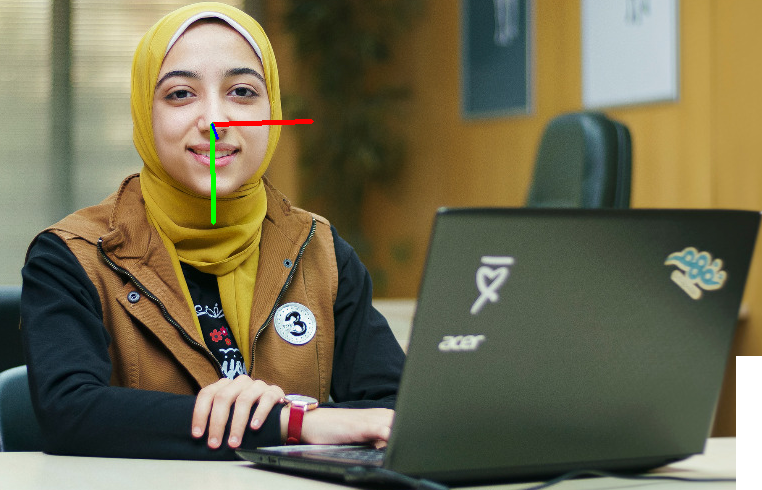

In [ ]:
random_file = 'Layer 2'
image = cv2.imread('/content/'+random_file+'.png')
image = pred(image)
cv2_imshow(image)

## Read From Camera ##

In [ ]:
random_file = 'my_video.mp4'
cap = cv2.VideoCapture('/content/'+random_file)

# Check if camera opened successfully
if (cap.isOpened() == False): 
  print("Unable to read camera feed")
 
# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
fps = int(cap.get(5))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('alaa.mp4', cv2.VideoWriter_fourcc(*'MP4V'), fps, (frame_width,frame_height))
 
while(True):
  ret, frame = cap.read()
 
  if ret == True: 
    updated = pred(frame)
    if type(updated) != type(None):
        out.write(updated)
    else:
        out.write(frame)
 
    # Press Q on keyboard to stop recording
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
 
  # Break the loop
  else:
    break 
 
# When everything done, release the video capture and video write objects
cap.release()
out.release()
 
# Closes all the frames
cv2.destroyAllWindows()